In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [2]:
df = pd.read_excel('Data20230120.xlsx', parse_dates=['DOB','System CAR Code Date'])
df.head()

Application Number  Principal Approve Amount  Principal Amount  \
0  25651226INSI00001                    7500.0              0.00   
1  25650620ULMB00004                   20000.0          13492.22   
2  25650620ULCR00002                  130000.0         125931.40   
3  25650621ULMB00001                   70000.0          60867.83   
4  25650621ULMB00011                    3000.0           1585.66   

   Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                            12      M 1992-12-05          พนักงานบริษัท   
1                            12      M 1986-08-15                  อื่นๆ   
2                            60      F 1996-04-30                  อื่นๆ   
3                            36      M 1979-04-01                  อื่นๆ   
4                            13      M 1967-05-04          STREET VENDOR   

   Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                     10000.00                   PU        TOYOTA   
1                     25000.09                   MC         HONDA   
2                     15000.00                  CAR         HONDA   
3                     20000.00                   MC        YAMAHA   
4                     30000.00                   MC         HONDA   

   Vehicle Model  Vehicle Release Year Vehicle Sub Model  Evaluation Amount  \
0  SPORT CRUISER                  2002                EP             225500   
1        PCX 160                  2018                BV              64500   
2          CIVIC                  2005                DK             220500   
3      N-MAX 155                  2021                CE              81500   
4     WAVE 125 I                  2010                AY              20000   

  System CAR Code (Daily) System CAR Code Date Final CAR Code Previous Month  \
0                      S1           2022-12-26                            S1   
1                      S1           2022-06-20                            S1   
2                      S1           2022-06-20                            S1   
3                      S1           2022-06-21                            S1   
4                      S1           2022-06-21                            S1   

   Day Past Due (Aging)     Application Status  
0                     4  APPLICATION_COMPLETED  
1                     0  APPLICATION_COMPLETED  
2                     0  APPLICATION_COMPLETED  
3                     0  APPLICATION_COMPLETED  
4                     0  APPLICATION_COMPLETED

In [3]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

In [4]:
print(df.shape)
df.tail()

(53496, 20)


Application Number  Principal Approve Amount  Principal Amount  \
53491  25651231ULMB00013                   40000.0          37993.41   
53492  25651231REUC00010                  140000.0         140000.00   
53493  25651231REUM00003                   61800.0          61800.00   
53494  25651230REUC00088                  180000.0         180000.00   
53495  25651231REUC00011                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
53491                            24      M 1977-02-25                เกษตรกร   
53492                            60      M 1965-06-30                เกษตรกร   
53493                            36      F 1983-11-21          STREET VENDOR   
53494                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53495                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
53491                      60000.0                   MC         HONDA   
53492                      24500.0                   PU         ISUZU   
53493                      45000.0                   MC         HONDA   
53494                      32000.0                   PU         MAZDA   
53495                      60000.0                  CAR         HONDA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
53491    WAVE 125 I                  2022                CP   
53492         D-MAX                  2006                CU   
53493       PCX 160                  2021                BQ   
53494      BT-50PRO                  2012                AL   
53495          JAZZ                  2005                BJ   

       Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
53491              53000                      S1           2022-12-31   
53492             176000                      S1           2022-12-31   
53493              82500                      S1           2022-12-31   
53494             280000                      S1           2022-12-31   
53495             164000                      S1           2022-12-31   

      Final CAR Code Previous Month  DPD     Application Status  age  
53491                            S1    0  APPLICATION_COMPLETED   46  
53492                            S1    0  APPLICATION_COMPLETED   58  
53493                            S1    0  APPLICATION_COMPLETED   40  
53494                            S1    0  APPLICATION_COMPLETED   49  
53495                            S1    0  APPLICATION_COMPLETED   33

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

In [6]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

# Data Preparation

##Data Cleansing

In [7]:
df.describe()

Principal Approve Amount  Principal Amount  \
count              5.349600e+04      5.349600e+04   
mean               1.016408e+05      9.874629e+04   
std                1.016980e+05      1.011526e+05   
min                3.000000e+03     -2.253340e+03   
25%                2.600000e+04      2.490000e+04   
50%                4.800000e+04      4.088499e+04   
75%                1.650000e+05      1.600000e+05   
max                2.000000e+06      2.000000e+06   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                  53496.000000                 5.349600e+04   
mean                      39.390459                 2.508492e+04   
std                       17.979958                 1.140369e+05   
min                        1.000000                 0.000000e+00   
25%                       24.000000                 1.500000e+04   
50%                       36.000000                 2.000000e+04   
75%                       60.000000                 3.000000e+04   
max                      120.000000                 2.000000e+07   

       Vehicle Release Year  Evaluation Amount           DPD           age  
count          53496.000000       5.349600e+04  53496.000000  53496.000000  
mean            2012.504598       1.647456e+05      1.132421     42.731475  
std                5.516438       1.597322e+05      7.415650     10.782026  
min             1976.000000       5.000000e+03      0.000000     21.000000  
25%             2008.000000       3.890000e+04      0.000000     34.000000  
50%             2013.000000       1.170000e+05      0.000000     42.000000  
75%             2017.000000       2.611250e+05      0.000000     51.000000  
max             2022.000000       3.282500e+06    147.000000     77.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

### **ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [9]:
missing = df.isnull().sum()
missing

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

### **แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปล**

In [10]:
missing_columns = list(missing[missing > 0].index)
missing_columns

[]

### **คำนวณ % ค่าว่างของทั้ง 18 columns**

In [11]:
total_missing = missing[missing > 0]
total_missing

Series([], dtype: int64)

In [12]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

Empty DataFrame
Columns: [number_of_missing_values]
Index: []

In [13]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

Empty DataFrame
Columns: [number_of_missing_values, percent]
Index: []

**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [14]:
for c in missing_columns:
  print(c, ":", df[c].dtype)

In [15]:
#original data size
df.shape[0]

53496

In [16]:
df.shape

(53496, 20)

###เลือกเฉพาะรถประเภท รถมอเตอร์ไซค์ รถยนต์ รถกระบะ

In [17]:
#df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

In [18]:
#indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
#df.drop(indexApp , inplace=True)

In [19]:
df.shape

(53496, 20)

In [20]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

Application Number  Principal Approve Amount  Principal Amount  \
0      25651226INSI00001                    7500.0              0.00   
1      25650620ULMB00004                   20000.0          13492.22   
2      25650620ULCR00002                  130000.0         125931.40   
3      25650621ULMB00001                   70000.0          60867.83   
4      25650621ULMB00011                    3000.0           1585.66   
...                  ...                       ...               ...   
53491  25651231ULMB00013                   40000.0          37993.41   
53492  25651231REUC00010                  140000.0         140000.00   
53493  25651231REUM00003                   61800.0          61800.00   
53494  25651230REUC00088                  180000.0         180000.00   
53495  25651231REUC00011                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                                12      M 1992-12-05          พนักงานบริษัท   
1                                12      M 1986-08-15                  อื่นๆ   
2                                60      F 1996-04-30                  อื่นๆ   
3                                36      M 1979-04-01                  อื่นๆ   
4                                13      M 1967-05-04          STREET VENDOR   
...                             ...    ...        ...                    ...   
53491                            24      M 1977-02-25                เกษตรกร   
53492                            60      M 1965-06-30                เกษตรกร   
53493                            36      F 1983-11-21          STREET VENDOR   
53494                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53495                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         10000.00                   PU        TOYOTA  ...   
1                         25000.09                   MC         HONDA  ...   
2                         15000.00                  CAR         HONDA  ...   
3                         20000.00                   MC        YAMAHA  ...   
4                         30000.00                   MC         HONDA  ...   
...                            ...                  ...           ...  ...   
53491                     60000.00                   MC         HONDA  ...   
53492                     24500.00                   PU         ISUZU  ...   
53493                     45000.00                   MC         HONDA  ...   
53494                     32000.00                   PU         MAZDA  ...   
53495                     60000.00                  CAR         HONDA  ...   

      Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                     2002                 EP            225500   
1                     2018                 BV             64500   
2                     2005                 DK            220500   
3                     2021                 CE             81500   
4                     2010                 AY             20000   
...                    ...                ...               ...   
53491                 2022                 CP             53000   
53492                 2006                 CU            176000   
53493                 2021                 BQ             82500   
53494                 2012                 AL            280000   
53495                 2005                 BJ            164000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
1                           S1           2022-06-20   
2                           S1           2022-06-20   
3                           S1           2022-06-21   
4                           S1           2022-06-21   
...                        ...                  ...   
53491                       S1           2022-12-31  

In [21]:
print(df['Collateral Type Code'])

0         PU
1         MC
2        CAR
3         MC
4         MC
        ... 
53491     MC
53492     PU
53493     MC
53494     PU
53495    CAR
Name: Collateral Type Code, Length: 53496, dtype: object


In [22]:
df['Collateral Type Code'].value_counts()

MC       25978
PU       14489
CAR      12330
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [23]:
df['Application Number'].value_counts()

25650711REUC00050    6
25650811ULMB00035    3
25650706ULMB00096    3
25650720ULMB00029    3
25650826REUC00121    3
                    ..
25650922ULCR00040    1
25650922ULMB00035    1
25650922ULMB00039    1
25650922REUM00012    1
25651231REUC00011    1
Name: Application Number, Length: 53423, dtype: int64

### Drop Application Number ที่ซ้ำกัน

In [24]:
df[df['Application Number'].duplicated()]

Application Number  Principal Approve Amount  Principal Amount  \
178    25650627REUM00012                   18000.0           4246.18   
188    25650627REUM00017                   50000.0           8475.68   
295    25650629ULCR00015                   60000.0          59928.81   
369    25650629ULMB00149                   34000.0          -2253.34   
446    25650629ULMB00319                    5000.0           2586.19   
...                  ...                       ...               ...   
21708  25651004ULMB00196                   26000.0          26000.00   
22663  25651006REUC00190                  250000.0         250000.00   
24290  25651011ULCR00132                  143000.0         143000.00   
26203  25651019ULMB00004                   34000.0          34000.00   
32590  25651105ULCR00078                   60000.0          58627.75   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
178                              24      M 1997-09-07          STREET VENDOR   
188                              36      M 1995-11-09                  อื่นๆ   
295                              36      M 1986-11-15                  อื่นๆ   
369                              12      F 2001-08-11                  อื่นๆ   
446                              12      F 1992-07-08          พนักงานบริษัท   
...                             ...    ...        ...                    ...   
21708                            36      M 1974-06-05                  อื่นๆ   
22663                            60      F 1979-03-04                  อื่นๆ   
24290                            60      M 1976-10-10          พนักงานบริษัท   
26203                            36      M 1983-08-12                  อื่นๆ   
32590                            60      M 1964-08-11                อาจารย์   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
178                        18000.0                   MC         HONDA  ...   
188                         1500.0                   MC         HONDA  ...   
295                        80000.0                  CAR         ISUZU  ...   
369                        20000.0                   MC         HONDA  ...   
446                        12000.0                   MC         HONDA  ...   
...                            ...                  ...           ...  ...   
21708                      15000.0                   MC         HONDA  ...   
22663                      40000.0                   PU        TOYOTA  ...   
24290                      13000.0                   PU        NISSAN  ...   
26203                      20000.0                   MC        YAMAHA  ...   
32590                      60000.0                   PU        TOYOTA  ...   

      Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
178                   2009                 AI             24000   
188                   2019                 CF             72000   
295                   2000                 FR            358000   
369                   2021                 BX             45500   
446                   2021                 BZ             43500   
...                    ...                ...               ...   
21708                 2013                 CC             35500   
22663                 2005                 AY            331000   
24290                 2007                 BR            204000   
26203                 2020                 CN             56500   
32590                 2005                 CM            301500   

       System CAR Code (Daily) System CAR Code Date  \
178                         S1           2022-12-08   
188                         S1           2022-12-28   
295                         S2           2023-01-03   
369                         S1           2022-09-21   
446                         S1           2022-06-29   
...                        ...                  ...   
21708                       S2           2023-01-03  

In [25]:
len(df[df['Application Number'].duplicated()])

73

In [26]:
df.drop_duplicates(['Application Number'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [27]:
len(df[df['Application Number'].duplicated()])

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53423 entries, 0 to 53422
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53423 non-null  object        
 1   Principal Approve Amount       53423 non-null  float64       
 2   Principal Amount               53423 non-null  float64       
 3   Repayment Tenor Month Number   53423 non-null  int64         
 4   Gender                         53423 non-null  object        
 5   DOB                            53423 non-null  datetime64[ns]
 6   Occupation Description         53423 non-null  object        
 7   Total Income Amount (Month)    53423 non-null  float64       
 8   Collateral Type Code           53423 non-null  object        
 9   Vehicle Brand                  53423 non-null  object        
 10  Vehicle Model                  53423 non-null  object        
 11  Vehicle Release

In [30]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64

# แปลงค่า float เป็น int

In [31]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)
df['Vehicle Age']=df['Vehicle Age'].astype(np.int64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53423 entries, 0 to 53422
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53423 non-null  object        
 1   Principal Approve Amount       53423 non-null  float64       
 2   Principal Amount               53423 non-null  float64       
 3   Repayment Tenor Month Number   53423 non-null  int32         
 4   Gender                         53423 non-null  object        
 5   DOB                            53423 non-null  datetime64[ns]
 6   Occupation Description         53423 non-null  object        
 7   Total Income Amount (Month)    53423 non-null  float64       
 8   Collateral Type Code           53423 non-null  object        
 9   Vehicle Brand                  53423 non-null  object        
 10  Vehicle Model                  53423 non-null  object        
 11  Vehicle Release

In [33]:
print(df.isna().sum())

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64


In [34]:
df

Application Number  Principal Approve Amount  Principal Amount  \
0      25651226INSI00001                    7500.0              0.00   
1      25650620ULMB00004                   20000.0          13492.22   
2      25650620ULCR00002                  130000.0         125931.40   
3      25650621ULMB00001                   70000.0          60867.83   
4      25650621ULMB00011                    3000.0           1585.66   
...                  ...                       ...               ...   
53418  25651231ULMB00013                   40000.0          37993.41   
53419  25651231REUC00010                  140000.0         140000.00   
53420  25651231REUM00003                   61800.0          61800.00   
53421  25651230REUC00088                  180000.0         180000.00   
53422  25651231REUC00011                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                                12      M 1992-12-05          พนักงานบริษัท   
1                                12      M 1986-08-15                  อื่นๆ   
2                                60      F 1996-04-30                  อื่นๆ   
3                                36      M 1979-04-01                  อื่นๆ   
4                                13      M 1967-05-04          STREET VENDOR   
...                             ...    ...        ...                    ...   
53418                            24      M 1977-02-25                เกษตรกร   
53419                            60      M 1965-06-30                เกษตรกร   
53420                            36      F 1983-11-21          STREET VENDOR   
53421                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53422                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         10000.00                   PU        TOYOTA  ...   
1                         25000.09                   MC         HONDA  ...   
2                         15000.00                  CAR         HONDA  ...   
3                         20000.00                   MC        YAMAHA  ...   
4                         30000.00                   MC         HONDA  ...   
...                            ...                  ...           ...  ...   
53418                     60000.00                   MC         HONDA  ...   
53419                     24500.00                   PU         ISUZU  ...   
53420                     45000.00                   MC         HONDA  ...   
53421                     32000.00                   PU         MAZDA  ...   
53422                     60000.00                  CAR         HONDA  ...   

      Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                     2002                 EP            225500   
1                     2018                 BV             64500   
2                     2005                 DK            220500   
3                     2021                 CE             81500   
4                     2010                 AY             20000   
...                    ...                ...               ...   
53418                 2022                 CP             53000   
53419                 2006                 CU            176000   
53420                 2021                 BQ             82500   
53421                 2012                 AL            280000   
53422                 2005                 BJ            164000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
1                           S1           2022-06-20   
2                           S1           2022-06-20   
3                           S1           2022-06-21   
4                           S1           2022-06-21   
...                        ...                  ...   
53418                       S1           2022-12-31  

In [35]:
df['DPD'].value_counts()

0      51355
25       368
2        267
55       177
22       165
7        136
28       133
13       112
4        104
17        70
58        64
19        62
52        52
10        52
47        42
32        29
43        22
89        22
37        20
40        19
93        15
63        15
78        13
83        13
49        11
74        10
116       10
86         9
108        7
65         6
34         6
98         5
68         5
95         4
113        4
104        4
71         4
80         3
110        3
119        2
147        1
132        1
124        1
Name: DPD, dtype: int64

In [36]:
df.describe()

Principal Approve Amount  Principal Amount  \
count              5.342300e+04      5.342300e+04   
mean               1.016615e+05      9.878349e+04   
std                1.017128e+05      1.011677e+05   
min                3.000000e+03     -2.253340e+03   
25%                2.600000e+04      2.490604e+04   
50%                4.800000e+04      4.090618e+04   
75%                1.650000e+05      1.600000e+05   
max                2.000000e+06      2.000000e+06   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                  53423.000000                 5.342300e+04   
mean                      39.391498                 2.509475e+04   
std                       17.982176                 1.141137e+05   
min                        1.000000                 0.000000e+00   
25%                       24.000000                 1.500000e+04   
50%                       36.000000                 2.000000e+04   
75%                       60.000000                 3.000000e+04   
max                      120.000000                 2.000000e+07   

       Vehicle Release Year  Evaluation Amount           DPD           age  \
count          53423.000000       5.342300e+04  53423.000000  53423.000000   
mean            2012.504464       1.647827e+05      1.101136     42.737622   
std                5.517658       1.597696e+05      7.273386     10.783113   
min             1976.000000       5.000000e+03      0.000000     21.000000   
25%             2008.000000       3.890000e+04      0.000000     34.000000   
50%             2013.000000       1.170000e+05      0.000000     42.000000   
75%             2017.000000       2.615000e+05      0.000000     51.000000   
max             2022.000000       3.282500e+06    147.000000     77.000000   

        Vehicle Age  
count  53423.000000  
mean      10.495536  
std        5.517658  
min        1.000000  
25%        6.000000  
50%       10.000000  
75%       15.000000  
max       47.000000

#Bining

##จัดช่วง PL, NPL

In [37]:
'''bins = [1,30,90]
#pl_npl = ['PL','NPL']

DPD_cate = pd.cut(df['DPD'], bins)'''

"bins = [1,30,90]\n#pl_npl = ['PL','NPL']\n\nDPD_cate = pd.cut(df['DPD'], bins)"

In [38]:
#DPD_cate

In [39]:
#DPD_cate.describe()

In [40]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [41]:
df0 = df[df['DPD']==0]
df0.shape

(51355, 21)

In [42]:
df_0 = df[df['DPD']==0].sample(frac=0.01, replace=True, random_state=101)
df_0.shape

(514, 21)

In [43]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)]
df1_30.shape

(1469, 21)

In [44]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)].sample(frac=0.35, replace=True, random_state=101)
df1_30.shape

(514, 21)

In [45]:
df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)]
df31_60.shape

(442, 21)

In [46]:
df61_90 = df[(df['DPD'] >= 60) & (df['DPD'] <= 90)]
df61_90.shape

(100, 21)

In [47]:
df90up = df[df['DPD']>=90]
df90up.shape

(57, 21)

In [48]:
print("DPD 0",df_0.shape)
print("df1_30",df1_30.shape)
print("df31_60",df31_60.shape)
print("df61_90",df61_90.shape)
print("df90up",df90up.shape)

DPD 0 (514, 21)
df1_30 (514, 21)
df31_60 (442, 21)
df61_90 (100, 21)
df90up (57, 21)


In [49]:
join_df = [df_0,df1_30,df31_60,df61_90,df90up]
new_df = pd.concat(join_df, ignore_index=True)

In [50]:
df = new_df

In [51]:
df.shape

(1627, 21)

In [52]:
df.head()

Application Number  Principal Approve Amount  Principal Amount  \
0  25651219ULMB00227                   22500.0          22500.00   
1  25650928REUC00038                  120000.0         120000.00   
2  25650927REUM00073                   13000.0          12823.10   
3  25650818REUC00021                  200000.0          77913.26   
4  25650805ULCR00115                  210000.0         205582.98   

   Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                            24      M 1963-10-04                เกษตรกร   
1                            60      F 1970-11-02          STREET VENDOR   
2                            30      F 1958-05-26          STREET VENDOR   
3                            36      F 1998-04-20          พนักงานบริษัท   
4                            60      F 1971-07-01                เกษตรกร   

   Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                      12000.0                   MC         HONDA  ...   
1                      15000.0                  CAR        NISSAN  ...   
2                      10000.0                   MC         HONDA  ...   
3                      25000.0                   PU        NISSAN  ...   
4                      12000.0                   PU         ISUZU  ...   

  Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                 2011                 BJ             36000   
1                 2012                 BV            192000   
2                 2008                 AA             18000   
3                 2010                 CM            191500   
4                 2006                 CI            264500   

   System CAR Code (Daily) System CAR Code Date Final CAR Code Previous Month  \
0                       S1           2022-12-19                            S1   
1                       S1           2022-09-28                            S1   
2                       S1           2022-09-27                            S1   
3                       S1           2022-12-27                            S2   
4                       S1           2022-08-05                            S1   

  DPD     Application Status age  Vehicle Age  
0   0  APPLICATION_COMPLETED  60           12  
1   0  APPLICATION_COMPLETED  53           11  
2   0  APPLICATION_COMPLETED  65           15  
3   0  APPLICATION_COMPLETED  25           13  
4   0  APPLICATION_COMPLETED  52           17  

[5 rows x 21 columns]

In [53]:
df['Collateral Type Code'].value_counts()

MC       958
PU       332
CAR      315
VAN       13
TRUCK      9
Name: Collateral Type Code, dtype: int64

In [54]:
df['DPD'].value_counts()

0      514
55     177
25     148
2       96
58      64
22      55
52      52
7       46
4       44
47      42
13      34
28      33
32      29
17      25
43      22
89      22
37      20
40      19
10      19
93      15
63      15
19      14
83      13
78      13
49      11
74      10
116     10
86       9
108      7
34       6
65       6
98       5
68       5
113      4
104      4
95       4
71       4
110      3
80       3
119      2
124      1
132      1
147      1
Name: DPD, dtype: int64

#อาจจะต้องแบ่งแบบตัว 0 วันมารวมใน PL ด้วย
0 วัน
1-30 วัน
31-60

In [55]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins = [0,90,147],
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

Application Number  Principal Approve Amount  Principal Amount  \
514   25650919REUM00020                   18000.0          17569.10   
1210  25650810REUM00068                   26000.0          24929.21   
1211  25650811ULMB00011                   26000.0          26000.00   
1212  25650811ULMB00032                   14000.0          14000.00   
1213  25650811REUM00057                   33000.0          33000.00   
...                 ...                       ...               ...   
509   25650720REUC00028                  237000.0         234437.91   
510   25650926ULCR00174                  250000.0         245259.01   
511   25650720REUC00001                  700000.0         694122.80   
512   25651028ULMB00015                   15800.0          14697.62   
513   25651029ULMB00017                   33500.0          32049.23   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
514                             36      F 1982-06-17          พนักงานบริษัท   
1210                            36      F 1981-01-02          STREET VENDOR   
1211                            36      M 2001-12-16                  อื่นๆ   
1212                            12      F 1993-12-23          STREET VENDOR   
1213                            18      M 1979-09-07          STREET VENDOR   
...                            ...    ...        ...                    ...   
509                             60      M 1996-04-17                  อื่นๆ   
510                             60      M 1963-12-06              ข้าราชการ   
511                             60      M 1971-08-21          พนักงานบริษัท   
512                             24      M 1973-01-06                  อื่นๆ   
513                             36      F 1998-01-14                  อื่นๆ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
514                       10000.0                   MC        YAMAHA  ...   
1210                      20000.0                   MC         HONDA  ...   
1211                      15000.0                   MC         HONDA  ...   
1212                      15000.0                   MC         HONDA  ...   
1213                      25000.0                   MC         HONDA  ...   
...                           ...                  ...           ...  ...   
509                           0.0                  CAR         HONDA  ...   
510                       40000.0                   PU        TOYOTA  ...   
511                      114160.0                   PU        TOYOTA  ...   
512                       19000.0                   MC         HONDA  ...   
513                       12000.0                   MC         HONDA  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
514                  2012                 AE             25000   
1210                 2013                 CC             35500   
1211                 2013                 BW             35000   
1212                 2011                 AI             21000   
1213                 2021                 BY             44000   
...                   ...                ...               ...   
509                  2013                 BN            358500   
510                  2014                 EZ            814000   
511                  2017                 DY           1172500   
512                  2010                 BC             21000   
513                  2021                 DO             45000   

      System CAR Code (Daily) System CAR Code Date  \
514                        S1           2022-09-19   
1210                       S2           2022-12-22   
1211                       S2           2022-12-07   
1212                       S2           2022-12-07   
1213                       S2           2022-12-07   
...                       ...                  ...   
509                        S1           2022-07-20   
510                        S1           2022-09-26   

In [56]:
df[(df['DPD'] == 'PL')]

Application Number  Principal Approve Amount  Principal Amount  \
514   25650919REUM00020                   18000.0          17569.10   
515   25651103TRUC00002                  260000.0         260000.00   
516   25650826REUC00052                  300000.0         300000.00   
517   25650708REUC00014                  220000.0         220000.00   
518   25651122TDUC00001                  103900.0         102134.64   
...                 ...                       ...               ...   
1565  25650822REUM00057                   17800.0          17800.00   
1566  25650824ULMB00054                   33000.0          33000.00   
1567  25650824REUM00039                   31500.0          31500.00   
1568  25650825ULMB00051                   30000.0          29711.00   
1569  25650831ULCR00077                   68400.0          67484.99   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
514                             36      F 1982-06-17          พนักงานบริษัท   
515                            120      M 1971-08-16                  อื่นๆ   
516                             60      F 1987-09-28            เลี้ยงสัตว์   
517                             60      F 1962-09-25          พนักงานบริษัท   
518                             60      M 1977-03-18                  อื่นๆ   
...                            ...    ...        ...                    ...   
1565                            24      M 1998-12-09          พนักงานบริษัท   
1566                            36      M 1979-09-16          พนักงานบริษัท   
1567                            36      F 1986-01-01          พนักงานบริษัท   
1568                            24      M 1985-12-22          STREET VENDOR   
1569                            24      M 1979-01-26              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
514                       10000.0                   MC        YAMAHA  ...   
515                       15000.0                   PU        TOYOTA  ...   
516                       30000.0                   PU        TOYOTA  ...   
517                       27880.0                   PU         ISUZU  ...   
518                       12000.0                  CAR          FORD  ...   
...                           ...                  ...           ...  ...   
1565                      12000.0                   MC           GPX  ...   
1566                      18000.0                   MC         HONDA  ...   
1567                      17000.0                   MC         HONDA  ...   
1568                      15000.0                   MC         HONDA  ...   
1569                      32680.0                  CAR          FORD  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
514                  2012                 AE             25000   
515                  2010                 DG            361500   
516                  2012                 DW            383000   
517                  2013                 BM            303500   
518                  2010                 BU            148500   
...                   ...                ...               ...   
1565                 2017                 AB             25500   
1566                 2014                 CA             42000   
1567                 2018                 DG             42000   
1568                 2013                 BW             35000   
1569                 2005                 BF            228000   

      System CAR Code (Daily) System CAR Code Date  \
514                        S1           2022-09-19   
515                        S2           2022-11-03   
516                        S2           2023-01-09   
517                        S2           2023-01-06   
518                        S2           2022-11-22   
...                       ...                  ...   
1565                       S2           2022-11-29   
1566                       S2           2022-11-24   

In [57]:
df[(df['DPD'] == 'NPL')]

Application Number  Principal Approve Amount  Principal Amount  \
1570  25650623REUM00003                   51000.0          50715.88   
1571  25650627ULMB00018                   37000.0          36011.72   
1572  25650629ULMB00287                   35000.0          35000.00   
1573  25650630ULCR00044                  190000.0         190000.00   
1574  25650630REUM00024                   15000.0          15000.00   
1575  25650630ULCR00064                  150000.0         150000.00   
1576  25650701ULCR00011                  150000.0         150000.00   
1577  25650701ULMB00063                   23000.0          23000.00   
1578  25650701ULMB00058                   46000.0          46000.00   
1579  25650702ULMB00070                   14200.0          13053.27   
1580  25650703ULMB00007                   28000.0          28000.00   
1581  25650704REUC00028                  230000.0         230000.00   
1582  25650706ULCR00033                  110000.0         110000.00   
1583  25650706ULMB00056                   29000.0          29000.00   
1584  25650706REUM00069                   27300.0          27300.00   
1585  25650706ULCR00103                  230000.0         230000.00   
1586  25650707ULMB00009                   29000.0          29000.00   
1587  25650707REUC00058                  140000.0         140000.00   
1588  25650708ULCR00005                  230000.0         230000.00   
1589  25650708ULCR00042                  152550.0         152550.00   
1590  25650708ULMB00052                   25000.0          25000.00   
1591  25650710ULCR00021                  250000.0         250000.00   
1592  25650710ULMB00026                   27300.0          27204.98   
1593  25650711ULCR00082                  190000.0         190000.00   
1594  25650711REUC00094                  180000.0         180000.00   
1595  25650714ULMB00078                   15000.0          15000.00   
1596  25650714ULMB00103                   20000.0          20000.00   
1597  25650716REUM00009                   42000.0          42000.00   
1598  25650716REUC00023                  180000.0         180000.00   
1599  25650716ULMB00075                   32000.0          32000.00   
1600  25650717ULMB00045                   21000.0          21000.00   
1601  25650718ULMB00133                   48000.0          48000.00   
1602  25650718ULMB00145                   30000.0          30000.00   
1603  25650719ULMB00109                   50000.0          50000.00   
1604  25650720REUM00011                   25000.0          25000.00   
1605  25650720REUM00015                   30000.0          30000.00   
1606  25650720REUC00038                   92000.0          92000.00   
1607  25650720ULMB00077                   32000.0          32000.00   
1608  25650720ULCR00075                  290000.0         290000.00   
1609  25650721ULMB00046                   25000.0          25000.00   
1610  25650721ULCR00039                  150000.0         150000.00   
1611  25650721REUC00110                  190000.0         190000.00   
1612  25650722ULCR00010                   70000.0          70000.00   
1613  25650722ULMB00050                   25000.0          25000.00   
1614  25650722REUC00104                  180000.0         180000.00   
1615  25650718ULCR00140                  125000.0         124670.06   
1616  25650723ULCR00041                  120000.0         120000.00   
1617  25650726ULMB00140                   17700.0          17700.00   
1618  25650727ULMB00035                   34000.0          34000.00   
1619  25650727ULCR00045                  154000.0         154000.00   
1620  25650727ULMB00082                   14000.0          14000.00   
1621  25650727ULMB00126                   45000.0          45000.00   
1622  25650730ULCR00055                  230000.0         230000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1624  25650817ULMB00101                   35000.0          33839.69   
1625  25650819ULMB00039      

In [58]:
df[df.DPD.isna()]

Application Number  Principal Approve Amount  Principal Amount  \
0    25651219ULMB00227                   22500.0          22500.00   
1    25650928REUC00038                  120000.0         120000.00   
2    25650927REUM00073                   13000.0          12823.10   
3    25650818REUC00021                  200000.0          77913.26   
4    25650805ULCR00115                  210000.0         205582.98   
..                 ...                       ...               ...   
509  25650720REUC00028                  237000.0         234437.91   
510  25650926ULCR00174                  250000.0         245259.01   
511  25650720REUC00001                  700000.0         694122.80   
512  25651028ULMB00015                   15800.0          14697.62   
513  25651029ULMB00017                   33500.0          32049.23   

     Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                              24      M 1963-10-04                เกษตรกร   
1                              60      F 1970-11-02          STREET VENDOR   
2                              30      F 1958-05-26          STREET VENDOR   
3                              36      F 1998-04-20          พนักงานบริษัท   
4                              60      F 1971-07-01                เกษตรกร   
..                            ...    ...        ...                    ...   
509                            60      M 1996-04-17                  อื่นๆ   
510                            60      M 1963-12-06              ข้าราชการ   
511                            60      M 1971-08-21          พนักงานบริษัท   
512                            24      M 1973-01-06                  อื่นๆ   
513                            36      F 1998-01-14                  อื่นๆ   

     Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                        12000.0                   MC         HONDA  ...   
1                        15000.0                  CAR        NISSAN  ...   
2                        10000.0                   MC         HONDA  ...   
3                        25000.0                   PU        NISSAN  ...   
4                        12000.0                   PU         ISUZU  ...   
..                           ...                  ...           ...  ...   
509                          0.0                  CAR         HONDA  ...   
510                      40000.0                   PU        TOYOTA  ...   
511                     114160.0                   PU        TOYOTA  ...   
512                      19000.0                   MC         HONDA  ...   
513                      12000.0                   MC         HONDA  ...   

    Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                   2011                 BJ             36000   
1                   2012                 BV            192000   
2                   2008                 AA             18000   
3                   2010                 CM            191500   
4                   2006                 CI            264500   
..                   ...                ...               ...   
509                 2013                 BN            358500   
510                 2014                 EZ            814000   
511                 2017                 DY           1172500   
512                 2010                 BC             21000   
513                 2021                 DO             45000   

     System CAR Code (Daily) System CAR Code Date  \
0                         S1           2022-12-19   
1                         S1           2022-09-28   
2                         S1           2022-09-27   
3                         S1           2022-12-27   
4                         S1           2022-08-05   
..                       ...                  ...   
509                       S1           2022-07-20   
510                       S1           2022-09-26   
511                       S1           2022-07-20   
51

In [59]:
df.DPD.fillna('PL', inplace=True)

In [60]:
df[df.DPD.isna()]

Empty DataFrame
Columns: [Application Number, Principal Approve Amount, Principal Amount, Repayment Tenor Month Number, Gender, DOB, Occupation Description, Total Income Amount (Month), Collateral Type Code, Vehicle Brand, Vehicle Model, Vehicle Release Year, Vehicle Sub Model, Evaluation Amount, System CAR Code (Daily), System CAR Code Date, Final CAR Code Previous Month, DPD, Application Status, age, Vehicle Age]
Index: []

[0 rows x 21 columns]

In [61]:
df.DPD.unique()

['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

In [62]:
df['DPD'].value_counts()

PL     1570
NPL      57
Name: DPD, dtype: int64

In [63]:
df[(df['System CAR Code (Daily)']=='S1')]

Application Number  Principal Approve Amount  Principal Amount  \
0     25651219ULMB00227                   22500.0          22500.00   
1     25650928REUC00038                  120000.0         120000.00   
2     25650927REUM00073                   13000.0          12823.10   
3     25650818REUC00021                  200000.0          77913.26   
4     25650805ULCR00115                  210000.0         205582.98   
...                 ...                       ...               ...   
1489  25650718ULMB00131                   12000.0          11979.73   
1521  25650802ULMB00104                   30000.0          27904.30   
1539  25650809REUC00059                  250000.0              0.00   
1563  25650820ULMB00069                   31000.0              0.00   
1569  25650831ULCR00077                   68400.0          67484.99   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               24      M 1963-10-04                เกษตรกร   
1                               60      F 1970-11-02          STREET VENDOR   
2                               30      F 1958-05-26          STREET VENDOR   
3                               36      F 1998-04-20          พนักงานบริษัท   
4                               60      F 1971-07-01                เกษตรกร   
...                            ...    ...        ...                    ...   
1489                            18      M 2001-03-20          พนักงานบริษัท   
1521                            36      F 1995-03-23          STREET VENDOR   
1539                            60      M 1980-06-24          STREET VENDOR   
1563                            30      F 1984-01-21                  อื่นๆ   
1569                            24      M 1979-01-26              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         12000.0                   MC         HONDA  ...   
1                         15000.0                  CAR        NISSAN  ...   
2                         10000.0                   MC         HONDA  ...   
3                         25000.0                   PU        NISSAN  ...   
4                         12000.0                   PU         ISUZU  ...   
...                           ...                  ...           ...  ...   
1489                       9000.0                   MC           GPX  ...   
1521                      25000.0                   MC         HONDA  ...   
1539                      20000.0                   PU         ISUZU  ...   
1563                      20000.0                   MC         HONDA  ...   
1569                      32680.0                  CAR          FORD  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                    2011                 BJ             36000   
1                    2012                 BV            192000   
2                    2008                 AA             18000   
3                    2010                 CM            191500   
4                    2006                 CI            264500   
...                   ...                ...               ...   
1489                 2017                 AF             17000   
1521                 2016                 CF             56000   
1539                 2016                 CQ            522500   
1563                 2019                 DS             43000   
1569                 2005                 BF            228000   

      System CAR Code (Daily) System CAR Code Date  \
0                          S1           2022-12-19   
1                          S1           2022-09-28   
2                          S1           2022-09-27   
3                          S1           2022-12-27   
4                          S1           2022-08-05   
...                       ...                  ...   
1489                       S1           2023-01-06   
1521                       S1           2023-01-06   

In [64]:
df[(df['System CAR Code (Daily)']=='S2')]

Application Number  Principal Approve Amount  Principal Amount  \
78    25651121TRUM00002                  29985.66          29459.01   
105   25651207TRUC00014                  88000.00          86890.80   
156   25651030TDUM00004                   6900.00           6562.73   
187   25651031TRUC00092                 130000.00         129564.08   
199   25651125TDUC00001                  48838.57          48838.57   
...                 ...                       ...               ...   
1564  25650822ULMB00193                  24000.00          24000.00   
1565  25650822REUM00057                  17800.00          17800.00   
1566  25650824ULMB00054                  33000.00          33000.00   
1567  25650824REUM00039                  31500.00          31500.00   
1624  25650817ULMB00101                  35000.00          33839.69   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
78                              60      F 1999-06-08          พนักงานบริษัท   
105                            120      F 1981-11-26          พนักงานบริษัท   
156                             36      F 1995-10-20          พนักงานบริษัท   
187                             96      F 1985-05-03          STREET VENDOR   
199                             84      F 1971-06-30          STREET VENDOR   
...                            ...    ...        ...                    ...   
1564                            36      F 1993-09-23                  อื่นๆ   
1565                            24      M 1998-12-09          พนักงานบริษัท   
1566                            36      M 1979-09-16          พนักงานบริษัท   
1567                            36      F 1986-01-01          พนักงานบริษัท   
1624                            24      F 1988-02-18          STREET VENDOR   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
78                        11000.0                   MC         HONDA  ...   
105                       34292.0                  CAR        TOYOTA  ...   
156                       10000.0                   MC         HONDA  ...   
187                       60000.0                   PU         ISUZU  ...   
199                       18000.0                  CAR         HONDA  ...   
...                           ...                  ...           ...  ...   
1564                      15000.0                   MC         HONDA  ...   
1565                      12000.0                   MC           GPX  ...   
1566                      18000.0                   MC         HONDA  ...   
1567                      17000.0                   MC         HONDA  ...   
1624                      70000.0                   MC        YAMAHA  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
78                   2020                 EC             40900   
105                  2003                 DX            131500   
156                  2005                 AE             23000   
187                  2006                 CU            176000   
199                  2001                 FI            131000   
...                   ...                ...               ...   
1564                 2017                 BD             32000   
1565                 2017                 AB             25500   
1566                 2014                 CA             42000   
1567                 2018                 DG             42000   
1624                 2017                 CQ             46500   

      System CAR Code (Daily) System CAR Code Date  \
78                         S2           2022-11-21   
105                        S2           2022-12-07   
156                        S2           2022-10-30   
187                        S2           2022-10-31   
199                        S2           2022-11-25   
...                       ...                  ...   
1564                       S2           2022-11-24   
1565                       S2           2022-11-29   

In [65]:
df[(df['System CAR Code (Daily)']=='S3')]

Application Number  Principal Approve Amount  Principal Amount  \
1472  25650630REUC00030                   70000.0          66449.75   
1474  25650702REUM00025                   10000.0           9996.01   
1476  25650706ULCR00040                  159000.0         159000.00   
1478  25650707ULCR00063                  100000.0          97932.23   
1480  25650708ULMB00007                   23000.0          22506.24   
...                 ...                       ...               ...   
1621  25650727ULMB00126                   45000.0          45000.00   
1622  25650730ULCR00055                  230000.0         230000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1625  25650819ULMB00039                   39000.0          39000.00   
1626  25650822ULCR00153                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
1472                            24      M 1978-02-28          พนักงานบริษัท   
1474                            12      M 1982-05-07          STREET VENDOR   
1476                            60      M 1986-05-07                เกษตรกร   
1478                            24      M 1976-09-15                  อื่นๆ   
1480                            24      M 1985-12-22          STREET VENDOR   
...                            ...    ...        ...                    ...   
1621                            18      F 1988-01-16          พนักงานบริษัท   
1622                            60      F 1989-06-29          STREET VENDOR   
1623                            60      M 1969-12-11              ข้าราชการ   
1625                            36      F 1988-01-09          พนักงานบริษัท   
1626                            60      F 1971-11-04                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
1472                      30000.0                  CAR        TOYOTA  ...   
1474                      18200.0                   MC         HONDA  ...   
1476                      20000.0                  CAR        TOYOTA  ...   
1478                      25000.0                   PU        TOYOTA  ...   
1480                      15000.0                   MC         HONDA  ...   
...                           ...                  ...           ...  ...   
1621                      40000.0                   MC         HONDA  ...   
1622                      50000.0                  CAR        TOYOTA  ...   
1623                      36000.0                  CAR        TOYOTA  ...   
1625                      15000.0                   MC         HONDA  ...   
1626                      20000.0                   PU        NISSAN  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
1472                 2005                 BJ            153000   
1474                 2007                 AC             14000   
1476                 2009                 DP            211500   
1478                 2003                 BF            163000   
1480                 2013                 BW             35000   
...                   ...                ...               ...   
1621                 2017                 CQ             61500   
1622                 2011                 AO            308000   
1623                 2010                 DX            222000   
1625                 2017                 CO             53000   
1626                 2019                 DQ            484500   

      System CAR Code (Daily) System CAR Code Date  \
1472                       S3           2023-01-02   
1474                       S3           2023-01-08   
1476                       S3           2023-01-11   
1478                       S3           2023-01-05   
1480                       S3           2023-01-08   
...                       ...                  ...   
1621                       S3           2022-12-27   
1622                       S3           2022-12-29   

In [66]:
df['Collateral Type Code'].value_counts()

MC       958
PU       332
CAR      315
VAN       13
TRUCK      9
Name: Collateral Type Code, dtype: int64

#นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner

In [67]:
df['Occupation Description'].unique()

array(['เกษตรกร', 'STREET VENDOR', 'พนักงานบริษัท', 'อื่นๆ', 'อาจารย์',
       'เลี้ยงสัตว์', 'พนักงานรัฐวิสาหกิจ', 'ข้าราชการ', 'วิศวกร',
       'บุคลากรทางการแพทย์'], dtype=object)

In [68]:
indexApp = df[(df['Vehicle Age']>=30)].index
df.drop(indexApp , inplace=True)
df

Application Number  Principal Approve Amount  Principal Amount  \
0     25651219ULMB00227                   22500.0          22500.00   
1     25650928REUC00038                  120000.0         120000.00   
2     25650927REUM00073                   13000.0          12823.10   
3     25650818REUC00021                  200000.0          77913.26   
4     25650805ULCR00115                  210000.0         205582.98   
...                 ...                       ...               ...   
1622  25650730ULCR00055                  230000.0         230000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1624  25650817ULMB00101                   35000.0          33839.69   
1625  25650819ULMB00039                   39000.0          39000.00   
1626  25650822ULCR00153                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               24      M 1963-10-04                เกษตรกร   
1                               60      F 1970-11-02          STREET VENDOR   
2                               30      F 1958-05-26          STREET VENDOR   
3                               36      F 1998-04-20          พนักงานบริษัท   
4                               60      F 1971-07-01                เกษตรกร   
...                            ...    ...        ...                    ...   
1622                            60      F 1989-06-29          STREET VENDOR   
1623                            60      M 1969-12-11              ข้าราชการ   
1624                            24      F 1988-02-18          STREET VENDOR   
1625                            36      F 1988-01-09          พนักงานบริษัท   
1626                            60      F 1971-11-04                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         12000.0                   MC         HONDA  ...   
1                         15000.0                  CAR        NISSAN  ...   
2                         10000.0                   MC         HONDA  ...   
3                         25000.0                   PU        NISSAN  ...   
4                         12000.0                   PU         ISUZU  ...   
...                           ...                  ...           ...  ...   
1622                      50000.0                  CAR        TOYOTA  ...   
1623                      36000.0                  CAR        TOYOTA  ...   
1624                      70000.0                   MC        YAMAHA  ...   
1625                      15000.0                   MC         HONDA  ...   
1626                      20000.0                   PU        NISSAN  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                    2011                 BJ             36000   
1                    2012                 BV            192000   
2                    2008                 AA             18000   
3                    2010                 CM            191500   
4                    2006                 CI            264500   
...                   ...                ...               ...   
1622                 2011                 AO            308000   
1623                 2010                 DX            222000   
1624                 2017                 CQ             46500   
1625                 2017                 CO             53000   
1626                 2019                 DQ            484500   

      System CAR Code (Daily) System CAR Code Date  \
0                          S1           2022-12-19   
1                          S1           2022-09-28   
2                          S1           2022-09-27   
3                          S1           2022-12-27   
4                          S1           2022-08-05   
...                       ...                  ...   
1622                       S3           2022-12-29   
1623                       S3           2022-12-29   

In [69]:
df.describe()

Principal Approve Amount  Principal Amount  \
count               1625.000000       1625.000000   
mean               89921.624646      86095.265354   
std               102138.000098     100101.336976   
min                 3000.000000          0.000000   
25%                24000.000000      22378.010000   
50%                32000.000000      31000.000000   
75%               145000.000000     140000.000000   
max               700000.000000     700000.000000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   1625.000000                  1625.000000   
mean                      38.622769                 23634.106332   
std                       18.505121                 20670.555938   
min                        4.000000                     0.000000   
25%                       24.000000                 15000.000000   
50%                       36.000000                 20000.000000   
75%                       60.000000                 30000.000000   
max                      120.000000                400000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  
count           1625.000000       1.625000e+03  1625.000000  1625.000000  
mean            2012.813538       1.394007e+05    40.401231    10.186462  
std                5.328986       1.545234e+05    10.307119     5.328986  
min             1994.000000       1.000000e+04    21.000000     1.000000  
25%             2010.000000       3.550000e+04    32.000000     6.000000  
50%             2013.000000       4.650000e+04    39.000000    10.000000  
75%             2017.000000       2.260000e+05    47.000000    13.000000  
max             2022.000000       1.301000e+06    71.000000    29.000000

In [70]:
df['Total Income Amount (Month)'].min()

0.0

In [71]:
df['Total Income Amount (Month)'].max()

400000.0

In [72]:
indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
df.drop(indexApp , inplace=True)

In [73]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)

In [74]:
df.describe()

Principal Approve Amount  Principal Amount  \
count               1588.000000       1588.000000   
mean               87716.335044      84318.236518   
std                98732.197411      97602.243941   
min                 3000.000000          0.000000   
25%                24000.000000      22345.895000   
50%                32000.000000      30994.970000   
75%               140000.000000     137981.070000   
max               700000.000000     700000.000000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   1588.000000                  1588.000000   
mean                      38.574307                 22269.224005   
std                       18.444423                 12243.925136   
min                        4.000000                  7000.000000   
25%                       24.000000                 15000.000000   
50%                       36.000000                 20000.000000   
75%                       60.000000                 30000.000000   
max                      120.000000                 97000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  
count           1588.000000       1.588000e+03  1588.000000  1588.000000  
mean            2012.831864       1.353823e+05    40.366499    10.168136  
std                5.302929       1.469123e+05    10.294733     5.302929  
min             1994.000000       1.000000e+04    21.000000     1.000000  
25%             2010.000000       3.550000e+04    32.000000     6.000000  
50%             2013.000000       4.650000e+04    39.000000    10.000000  
75%             2017.000000       2.225000e+05    47.000000    13.000000  
max             2022.000000       1.301000e+06    71.000000    29.000000

#Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [75]:
df['Repayment Tenor Month Number'].value_counts()

36     487
60     402
24     267
12     136
18     115
48      75
30      48
120     15
72       9
42       8
61       6
54       5
84       5
96       3
49       2
38       1
50       1
28       1
108      1
4        1
Name: Repayment Tenor Month Number, dtype: int64

In [76]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
df.head(15)

Application Number  Principal Approve Amount  Principal Amount  \
0   25651219ULMB00227                   22500.0          22500.00   
1   25650928REUC00038                  120000.0         120000.00   
2   25650927REUM00073                   13000.0          12823.10   
3   25650818REUC00021                  200000.0          77913.26   
4   25650805ULCR00115                  210000.0         205582.98   
5   25651227REUC00079                  230000.0         230000.00   
6   25650906REUC00117                  295000.0         295000.00   
7   25651005ULCR00155                  150000.0         129467.16   
8   25651110ULMB00004                   48000.0          47094.32   
9   25650926ULCR00106                   60000.0          57764.40   
10  25651010ULMB00185                   25500.0          25319.09   
11  25651010REUC00199                  230000.0         230000.00   
12  25651119REUC00052                   90000.0          88280.08   
13  25650809ULCR00101                  128000.0         124445.40   
14  25650909ULMB00030                   33000.0          32992.99   

    Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                             24      M 1963-10-04                เกษตรกร   
1                             60      F 1970-11-02          STREET VENDOR   
2                             30      F 1958-05-26          STREET VENDOR   
3                             36      F 1998-04-20          พนักงานบริษัท   
4                             60      F 1971-07-01                เกษตรกร   
5                             60      M 1958-11-29                เกษตรกร   
6                             60      F 1971-12-03          STREET VENDOR   
7                             12      F 1975-02-13          พนักงานบริษัท   
8                             36      M 1991-10-11          พนักงานบริษัท   
9                             48      F 1971-04-21          STREET VENDOR   
10                            36      F 1985-03-06          STREET VENDOR   
11                            60      M 1960-01-14                เกษตรกร   
12                            48      F 1991-02-15                  อื่นๆ   
13                            60      M 1970-01-29                อาจารย์   
14                            12      M 1990-08-16          STREET VENDOR   

    Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                       12000.0                   MC         HONDA  ...   
1                       15000.0                  CAR        NISSAN  ...   
2                       10000.0                   MC         HONDA  ...   
3                       25000.0                   PU        NISSAN  ...   
4                       12000.0                   PU         ISUZU  ...   
5                       40000.0                   PU         ISUZU  ...   
6                       30000.0                   PU         ISUZU  ...   
7                       30000.0                  CAR        TOYOTA  ...   
8                       20500.0                   MC         VESPA  ...   
9                       60000.0                  CAR        TOYOTA  ...   
10                      10000.0                   MC         HONDA  ...   
11                      25000.0                   PU         ISUZU  ...   
12                      15000.0                   PU        TOYOTA  ...   
13                      27860.0                  CAR    MITSUBISHI  ...   
14                      18000.0                   MC         HONDA  ...   

   Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                  2011                 BJ             36000   
1                  2012                 BV            192000   
2                  2008                 AA             18000   
3                  2010                 CM            191500   
4                  2006                 CI            264500   
5                  2011                 AO            330000   
6               

In [77]:
df['Repayment Tenor Month Number'].value_counts()

36     487
60     402
24     267
12     136
18     115
48      75
30      48
120     15
72       9
42       8
61       6
84       5
54       5
96       3
108      1
Name: Repayment Tenor Month Number, dtype: int64

#ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [78]:
df.shape

(1582, 21)

In [79]:
df[(df['DPD']=='PL')]

Application Number  Principal Approve Amount  Principal Amount  \
0     25651219ULMB00227                   22500.0          22500.00   
1     25650928REUC00038                  120000.0         120000.00   
2     25650927REUM00073                   13000.0          12823.10   
3     25650818REUC00021                  200000.0          77913.26   
4     25650805ULCR00115                  210000.0         205582.98   
...                 ...                       ...               ...   
1565  25650822REUM00057                   17800.0          17800.00   
1566  25650824ULMB00054                   33000.0          33000.00   
1567  25650824REUM00039                   31500.0          31500.00   
1568  25650825ULMB00051                   30000.0          29711.00   
1569  25650831ULCR00077                   68400.0          67484.99   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               24      M 1963-10-04                เกษตรกร   
1                               60      F 1970-11-02          STREET VENDOR   
2                               30      F 1958-05-26          STREET VENDOR   
3                               36      F 1998-04-20          พนักงานบริษัท   
4                               60      F 1971-07-01                เกษตรกร   
...                            ...    ...        ...                    ...   
1565                            24      M 1998-12-09          พนักงานบริษัท   
1566                            36      M 1979-09-16          พนักงานบริษัท   
1567                            36      F 1986-01-01          พนักงานบริษัท   
1568                            24      M 1985-12-22          STREET VENDOR   
1569                            24      M 1979-01-26              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         12000.0                   MC         HONDA  ...   
1                         15000.0                  CAR        NISSAN  ...   
2                         10000.0                   MC         HONDA  ...   
3                         25000.0                   PU        NISSAN  ...   
4                         12000.0                   PU         ISUZU  ...   
...                           ...                  ...           ...  ...   
1565                      12000.0                   MC           GPX  ...   
1566                      18000.0                   MC         HONDA  ...   
1567                      17000.0                   MC         HONDA  ...   
1568                      15000.0                   MC         HONDA  ...   
1569                      32680.0                  CAR          FORD  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                    2011                 BJ             36000   
1                    2012                 BV            192000   
2                    2008                 AA             18000   
3                    2010                 CM            191500   
4                    2006                 CI            264500   
...                   ...                ...               ...   
1565                 2017                 AB             25500   
1566                 2014                 CA             42000   
1567                 2018                 DG             42000   
1568                 2013                 BW             35000   
1569                 2005                 BF            228000   

      System CAR Code (Daily) System CAR Code Date  \
0                          S1           2022-12-19   
1                          S1           2022-09-28   
2                          S1           2022-09-27   
3                          S1           2022-12-27   
4                          S1           2022-08-05   
...                       ...                  ...   
1565                       S2           2022-11-29   
1566                       S2           2022-11-24   

In [80]:
df[(df['DPD']=='NPL')]

Application Number  Principal Approve Amount  Principal Amount  \
1570  25650623REUM00003                   51000.0          50715.88   
1571  25650627ULMB00018                   37000.0          36011.72   
1572  25650629ULMB00287                   35000.0          35000.00   
1573  25650630ULCR00044                  190000.0         190000.00   
1574  25650630REUM00024                   15000.0          15000.00   
1575  25650630ULCR00064                  150000.0         150000.00   
1576  25650701ULCR00011                  150000.0         150000.00   
1577  25650701ULMB00063                   23000.0          23000.00   
1578  25650701ULMB00058                   46000.0          46000.00   
1579  25650702ULMB00070                   14200.0          13053.27   
1580  25650703ULMB00007                   28000.0          28000.00   
1581  25650704REUC00028                  230000.0         230000.00   
1582  25650706ULCR00033                  110000.0         110000.00   
1583  25650706ULMB00056                   29000.0          29000.00   
1584  25650706REUM00069                   27300.0          27300.00   
1585  25650706ULCR00103                  230000.0         230000.00   
1586  25650707ULMB00009                   29000.0          29000.00   
1587  25650707REUC00058                  140000.0         140000.00   
1588  25650708ULCR00005                  230000.0         230000.00   
1589  25650708ULCR00042                  152550.0         152550.00   
1590  25650708ULMB00052                   25000.0          25000.00   
1591  25650710ULCR00021                  250000.0         250000.00   
1592  25650710ULMB00026                   27300.0          27204.98   
1593  25650711ULCR00082                  190000.0         190000.00   
1594  25650711REUC00094                  180000.0         180000.00   
1595  25650714ULMB00078                   15000.0          15000.00   
1596  25650714ULMB00103                   20000.0          20000.00   
1597  25650716REUM00009                   42000.0          42000.00   
1598  25650716REUC00023                  180000.0         180000.00   
1599  25650716ULMB00075                   32000.0          32000.00   
1600  25650717ULMB00045                   21000.0          21000.00   
1601  25650718ULMB00133                   48000.0          48000.00   
1602  25650718ULMB00145                   30000.0          30000.00   
1603  25650719ULMB00109                   50000.0          50000.00   
1604  25650720REUM00011                   25000.0          25000.00   
1605  25650720REUM00015                   30000.0          30000.00   
1606  25650720REUC00038                   92000.0          92000.00   
1607  25650720ULMB00077                   32000.0          32000.00   
1608  25650720ULCR00075                  290000.0         290000.00   
1609  25650721ULMB00046                   25000.0          25000.00   
1610  25650721ULCR00039                  150000.0         150000.00   
1611  25650721REUC00110                  190000.0         190000.00   
1612  25650722ULCR00010                   70000.0          70000.00   
1613  25650722ULMB00050                   25000.0          25000.00   
1614  25650722REUC00104                  180000.0         180000.00   
1615  25650718ULCR00140                  125000.0         124670.06   
1616  25650723ULCR00041                  120000.0         120000.00   
1617  25650726ULMB00140                   17700.0          17700.00   
1618  25650727ULMB00035                   34000.0          34000.00   
1619  25650727ULCR00045                  154000.0         154000.00   
1620  25650727ULMB00082                   14000.0          14000.00   
1621  25650727ULMB00126                   45000.0          45000.00   
1622  25650730ULCR00055                  230000.0         230000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1624  25650817ULMB00101                   35000.0          33839.69   
1625  25650819ULMB00039      

#ทำการแบ่งข้อมูล จาก 6479 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [81]:
'''df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
df_pl.shape'''

"df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)\ndf_pl.shape"

In [82]:
'''df_npl = df.loc[df['DPD']!='PL']
df_npl.shape'''

"df_npl = df.loc[df['DPD']!='PL']\ndf_npl.shape"

PL 257 rows

NPL 42 rows

total 299 rows

คิด % NPL ได้เท่ากับ 14.046%

In [83]:
'''join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)'''

'join_df = [df_pl,df_npl]\nnew_df = pd.concat(join_df, ignore_index=True)'

In [84]:
#new_df['DPD'].describe()

In [85]:
#new_df['DPD'].value_counts()

In [86]:
#new_df.describe()

In [87]:
#new_df['Total Income Amount (Month)'].value_counts()

In [88]:
#new_df['Repayment Tenor Month Number'].value_counts()

In [89]:
#new_df['Vehicle Age'].value_counts(ascending=False)

In [90]:
#new_df['Application Status'].value_counts()

In [91]:
#new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

In [92]:
category = ['Collateral Type Code','Vehicle Release Year','Vehicle Age','age','Repayment Tenor Month Number','Occupation Description','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Collateral Type Code:['MC' 'CAR' 'PU' 'TRUCK' 'VAN']

Vehicle Release Year:[2011 2012 2008 2010 2006 2013 2014 2020 2007 2019 2016 2017 2018 2003
 2001 2005 2004 2009 2021 2015 1997 2002 2000 2022 1999 1995 1994 1996]

Vehicle Age:[12 11 15 13 17 10  9  3 16  4  7  6  5 20 22 18 19 14  2  8 26 21 23  1
 24 28 29 27]

age:[60 53 65 25 52 48 32 38 63 33 45 30 55 44 49 36 57 58 34 21 28 37 50 40
 47 59 61 26 51 35 56 27 46 41 29 24 43 67 23 31 42 54 66 68 22 69 62 70
 39 64 71]

Repayment Tenor Month Number:[ 24  60  30  36  12  48  18 120  96  84  42  72  54 108  61]

Occupation Description:['เกษตรกร' 'STREET VENDOR' 'พนักงานบริษัท' 'อื่นๆ' 'อาจารย์' 'เลี้ยงสัตว์'
 'พนักงานรัฐวิสาหกิจ' 'ข้าราชการ' 'วิศวกร' 'บุคลากรทางการแพทย์']

System CAR Code (Daily):['S1' 'S2' 'S3']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [93]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Collateral Type Code:MC       944
PU       317
CAR      304
VAN       13
TRUCK      4
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2012    146
2019    140
2018    116
2017    116
2010    115
2016    114
2013    112
2011     95
2014     84
2020     65
2005     64
2015     58
2008     52
2007     49
2009     49
2006     38
2004     34
2003     33
2021     26
2022     22
2002     21
2001     13
1999      6
1997      4
2000      3
1996      3
1995      2
1994      2
Name: Vehicle Release Year, dtype: int64

Vehicle Age:11    146
4     140
5     116
6     116
13    115
7     114
10    112
12     95
9      84
3      65
18     64
8      58
15     52
16     49
14     49
17     38
19     34
20     33
2      26
1      22
21     21
22     13
24      6
26      4
23      3
27      3
28      2
29      2
Name: Vehicle Age, dtype: int64

age:40    74
38    63
32    62
41    61
39    60
43    58
33    58
37    56
36    55
30    54
31    52
35    50
29    50
45    49
44    46
52    46


#Drop Data Complete and Reject

In [94]:
indexApp = df[ (df['Application Status'] != 'APPLICATION_COMPLETED') & (df['Application Status'] != 'APPLICATION_REJECTED') ].index
df.drop(indexApp , inplace=True)
df.shape

(1582, 21)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 0 to 1626
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             1582 non-null   object        
 1   Principal Approve Amount       1582 non-null   float64       
 2   Principal Amount               1582 non-null   float64       
 3   Repayment Tenor Month Number   1582 non-null   int32         
 4   Gender                         1582 non-null   object        
 5   DOB                            1582 non-null   datetime64[ns]
 6   Occupation Description         1582 non-null   object        
 7   Total Income Amount (Month)    1582 non-null   float64       
 8   Collateral Type Code           1582 non-null   object        
 9   Vehicle Brand                  1582 non-null   object        
 10  Vehicle Model                  1582 non-null   object        
 11  Vehicle Release Y

#Q1-Q3 Boxplot

In [96]:
cal_Q1 = df["Principal Amount"].quantile(0.25)
cal_Q3 = df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

112705.48

In [97]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -146763.7 upper: 304058.22


In [98]:
df.shape

(1582, 21)

<AxesSubplot:>

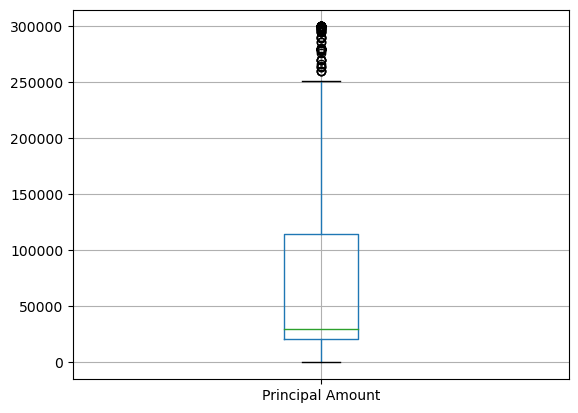

In [99]:
df = df[(df['Principal Amount'] > lower_limit) & (df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

<AxesSubplot:>

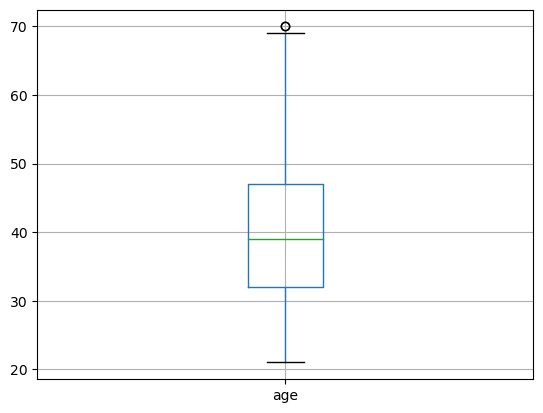

In [100]:
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]
df.boxplot(column=['age'])

<AxesSubplot:>

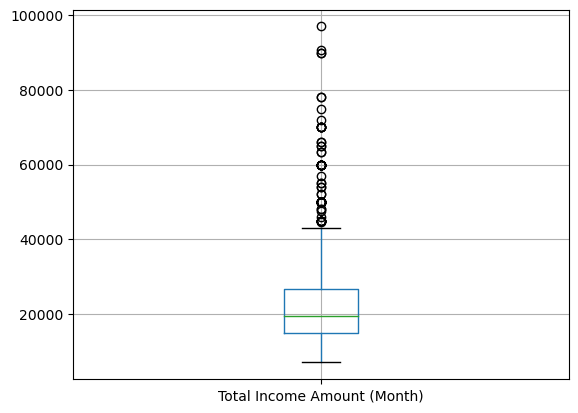

In [101]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [102]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

11690.0

In [103]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -2535.0 upper: 44225.0


<AxesSubplot:>

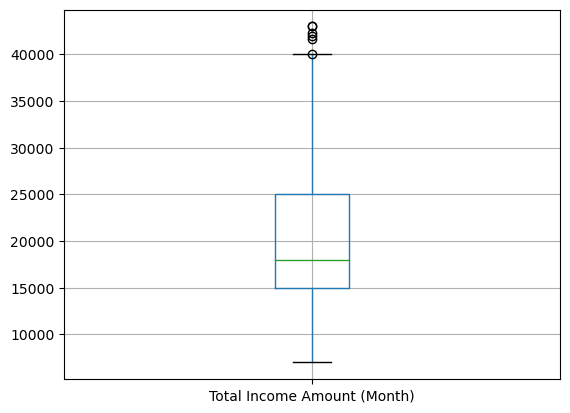

In [104]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

<AxesSubplot:>

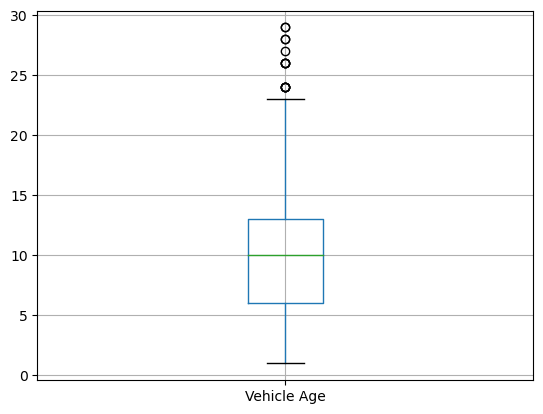

In [105]:
df = df[(df['Vehicle Age'] > lower_limit) & (df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [106]:
df['Gender'].value_counts()

F    785
M    657
Name: Gender, dtype: int64

In [107]:
df.describe()

Principal Approve Amount  Principal Amount  \
count               1442.000000       1442.000000   
mean               73358.587933      69852.153745   
std                78841.870289      76944.116615   
min                 3000.000000          0.000000   
25%                23000.000000      20145.235000   
50%                31000.000000      29962.095000   
75%               115000.000000     109557.397500   
max               481000.000000     300000.000000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   1442.000000                  1442.000000   
mean                      37.429958                 19714.540028   
std                       17.912026                  8051.658745   
min                       12.000000                  7000.000000   
25%                       24.000000                 15000.000000   
50%                       36.000000                 18000.000000   
75%                       48.000000                 25000.000000   
max                      120.000000                 43000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  
count           1442.000000        1442.000000  1442.000000  1442.000000  
mean            2012.785021      115135.367545    40.038141    10.214979  
std                5.314753      120067.719084    10.281631     5.314753  
min             1994.000000       10000.000000    21.000000     1.000000  
25%             2010.000000       35000.000000    32.000000     6.000000  
50%             2013.000000       44000.000000    39.000000    10.000000  
75%             2017.000000      199750.000000    47.000000    13.000000  
max             2022.000000      831000.000000    70.000000    29.000000

#Data Visualize

##Exploratory Data Analysis

###categorical

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

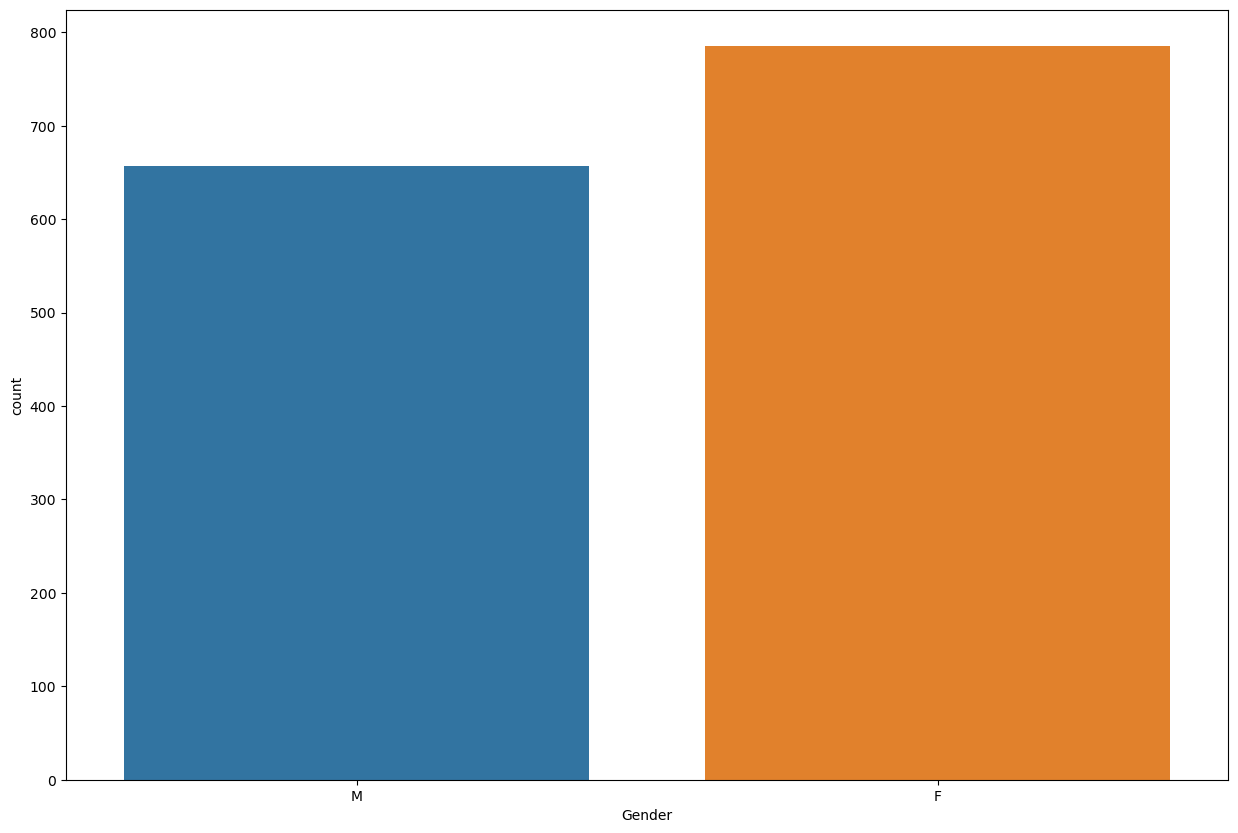

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation Description', ylabel='count'>

c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3625 (\N{THAI CHARACTER SO RUSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anac

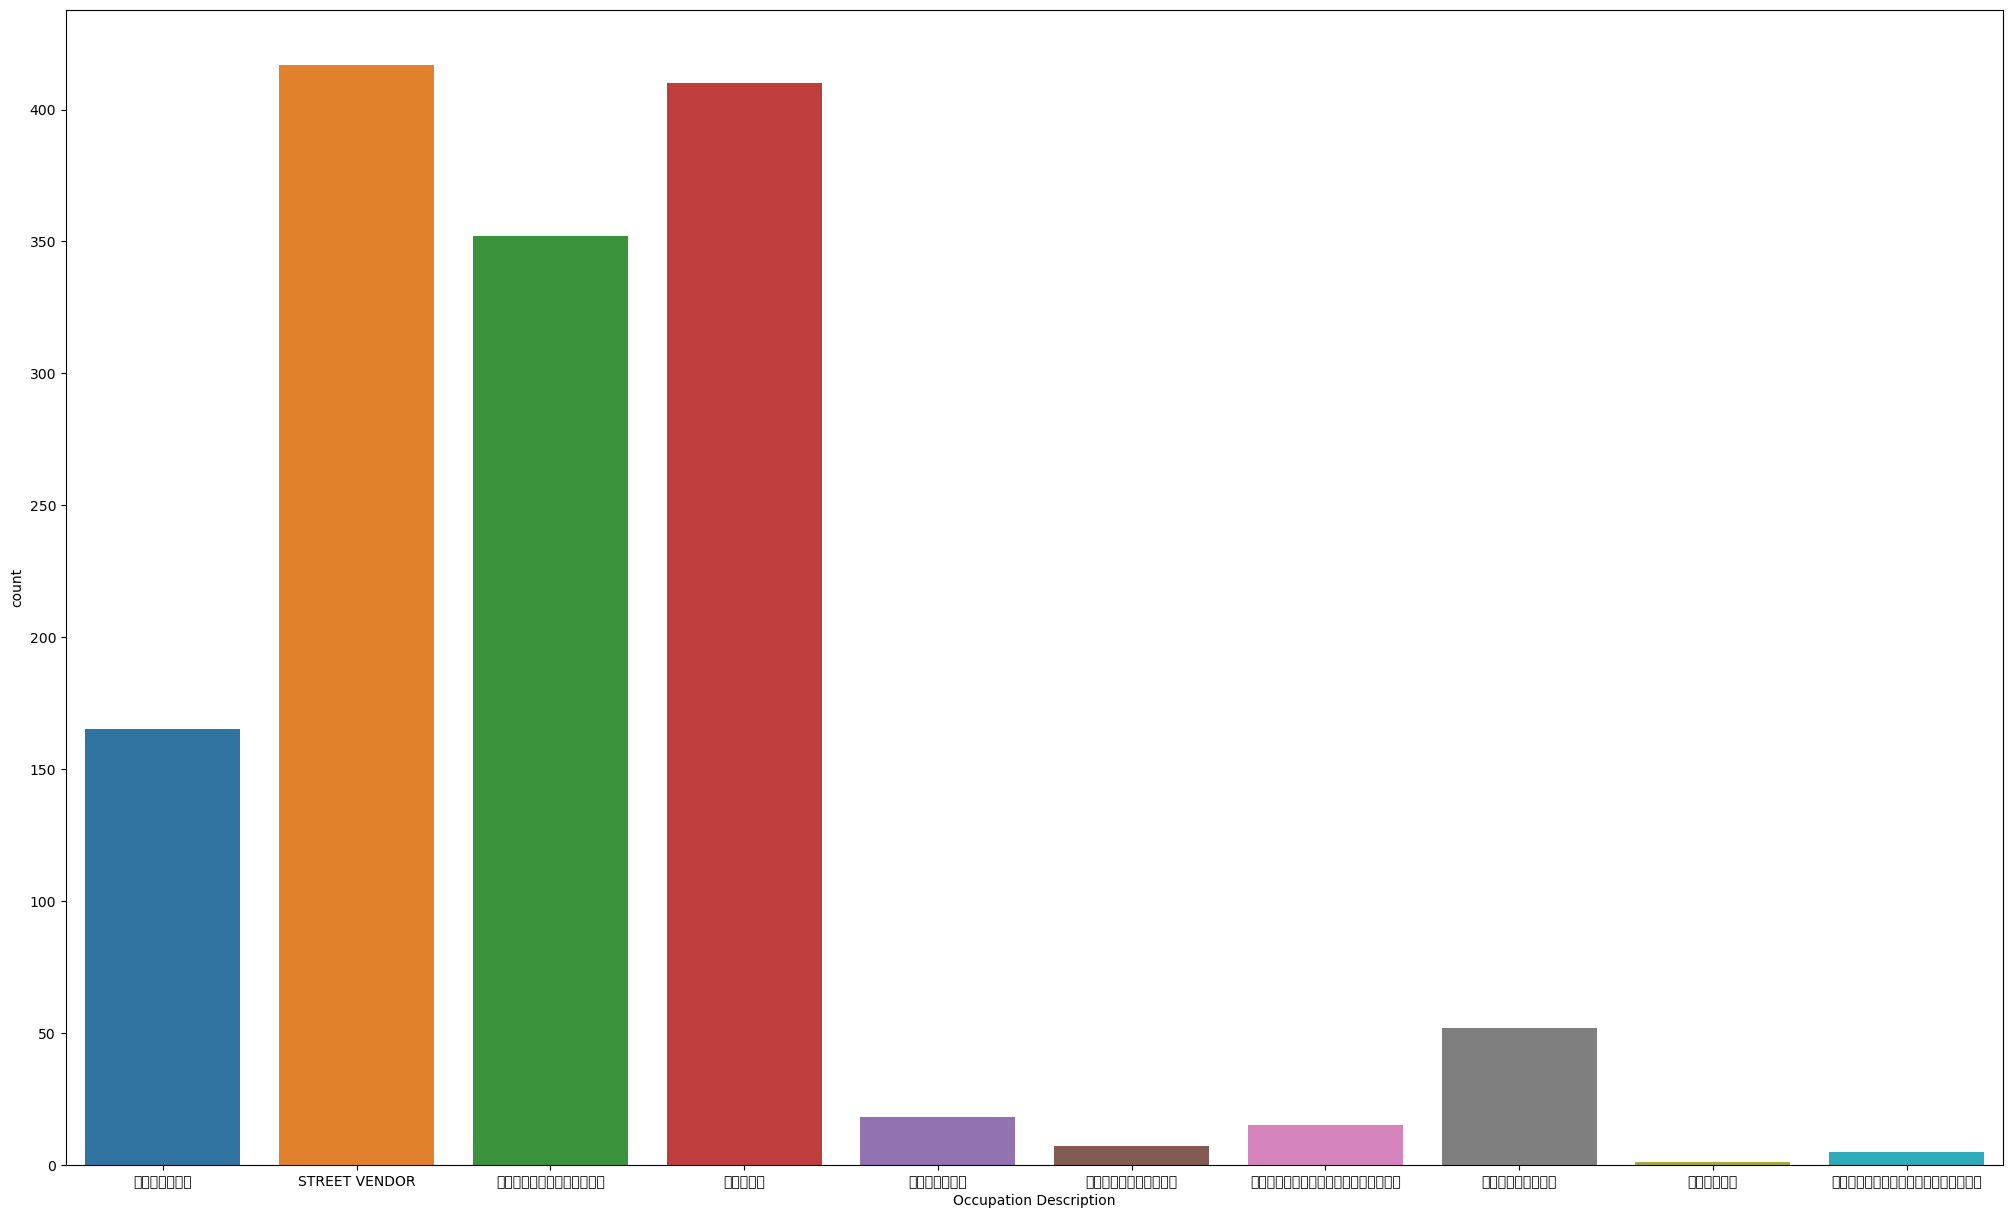

In [143]:
plt.figure(figsize=(25,15))
sns.countplot(df['Occupation Description'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Age', ylabel='count'>

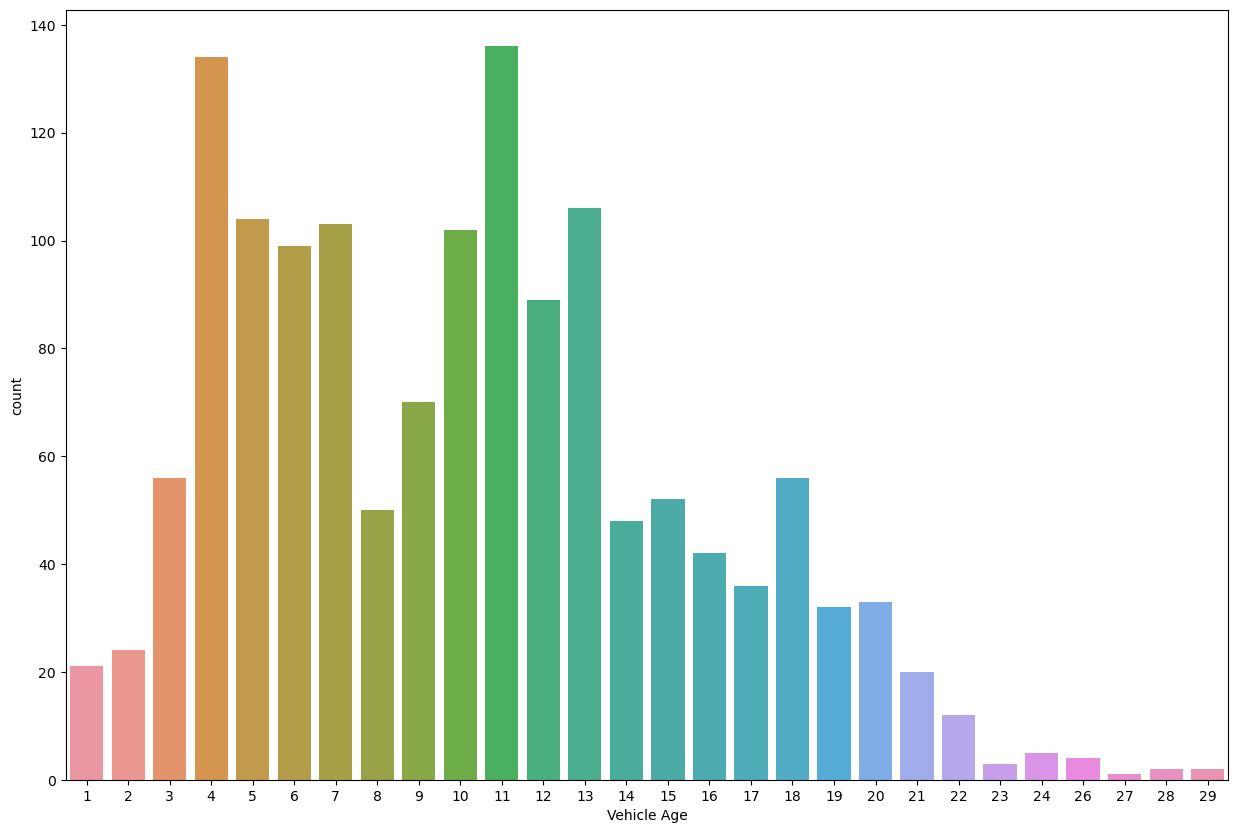

In [109]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Collateral Type Code', ylabel='count'>

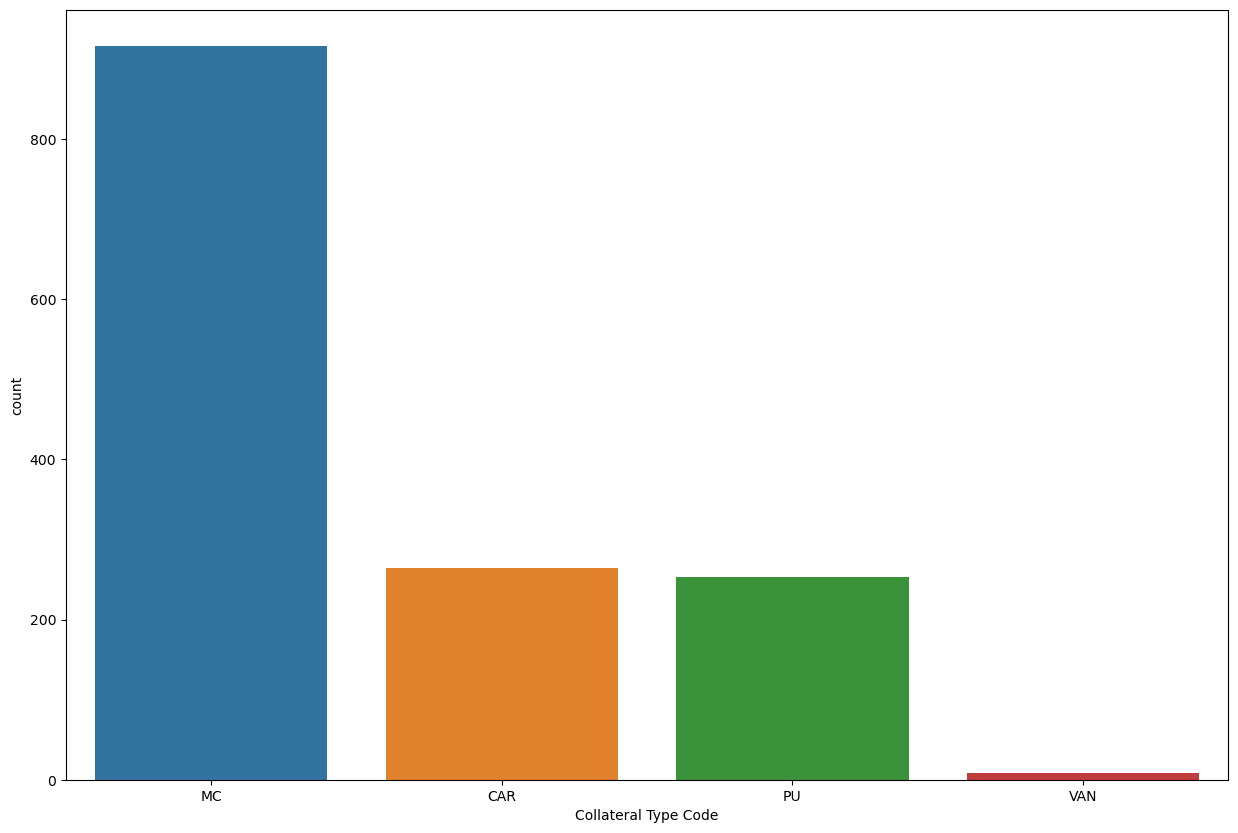

In [110]:
plt.figure(figsize=(15,10))
sns.countplot(df['Collateral Type Code'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Brand', ylabel='count'>

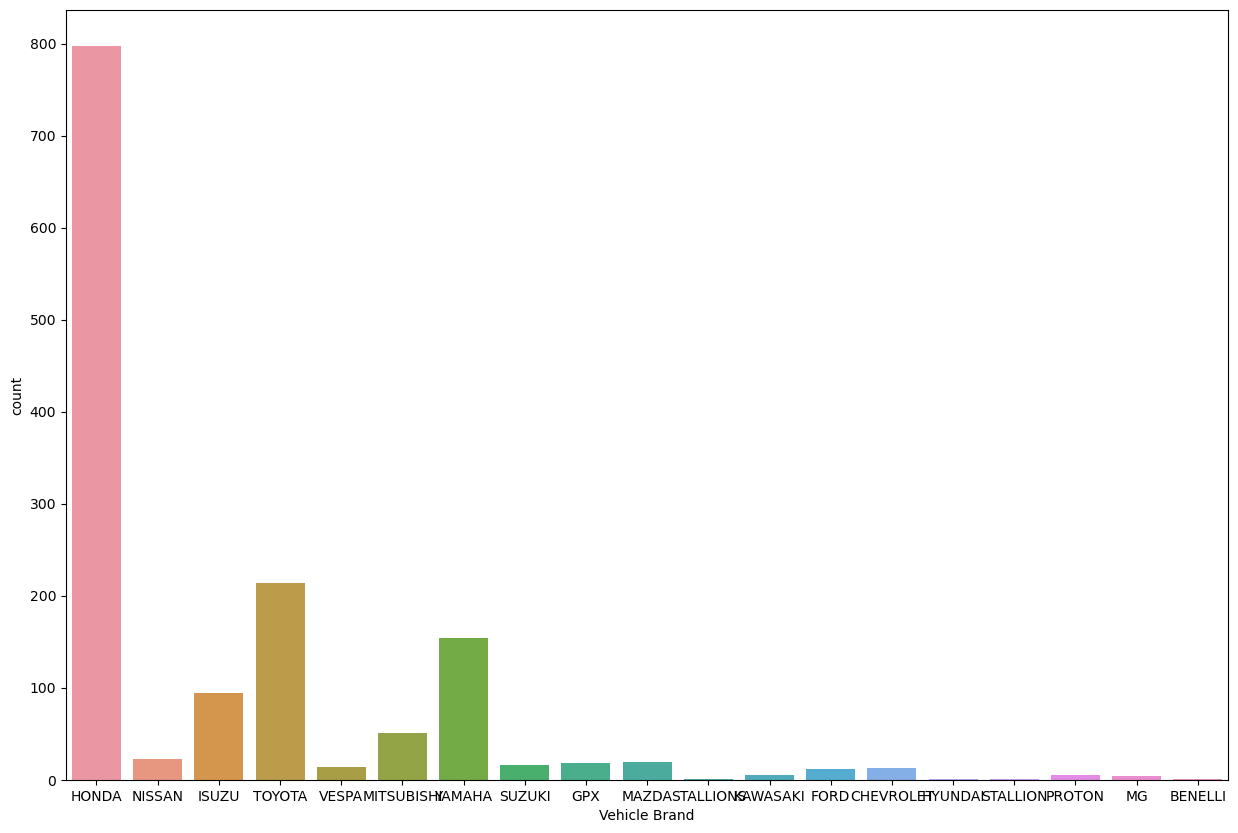

In [112]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='System CAR Code (Daily)', ylabel='count'>

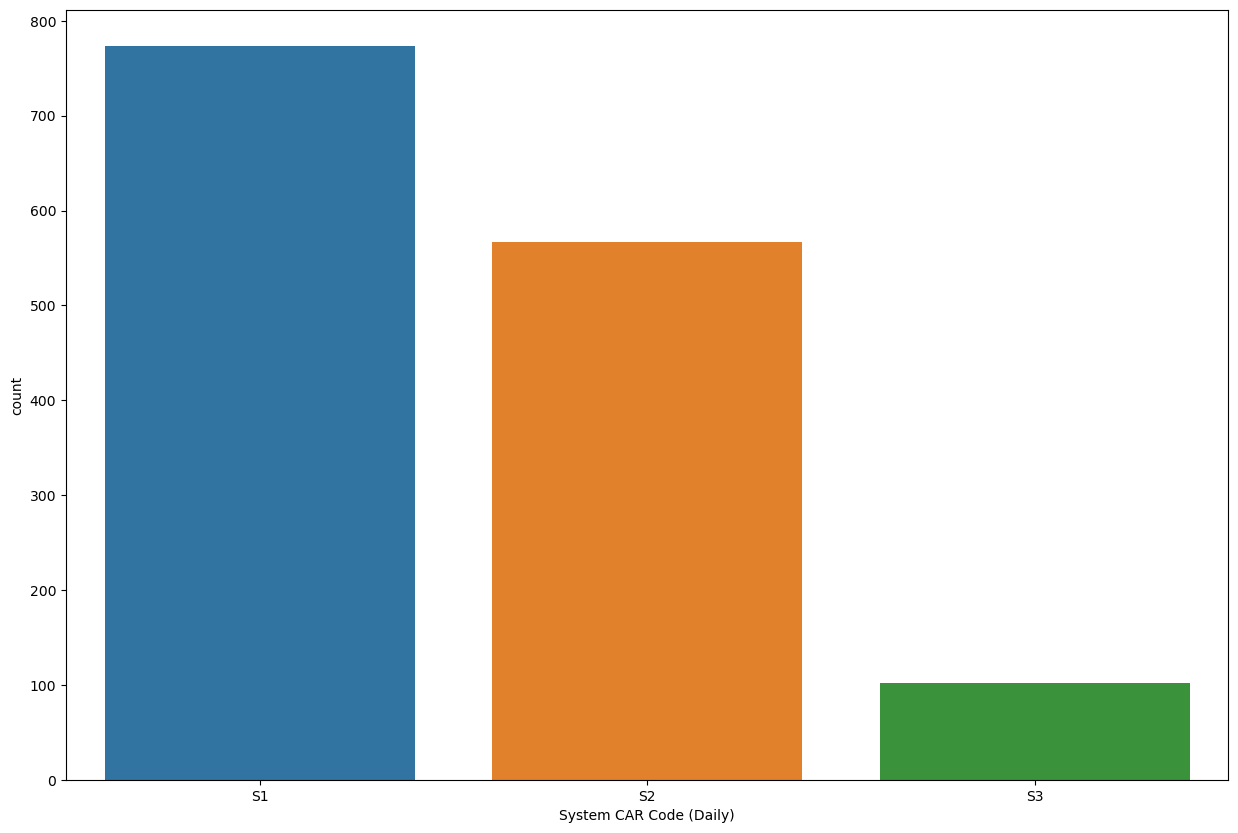

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

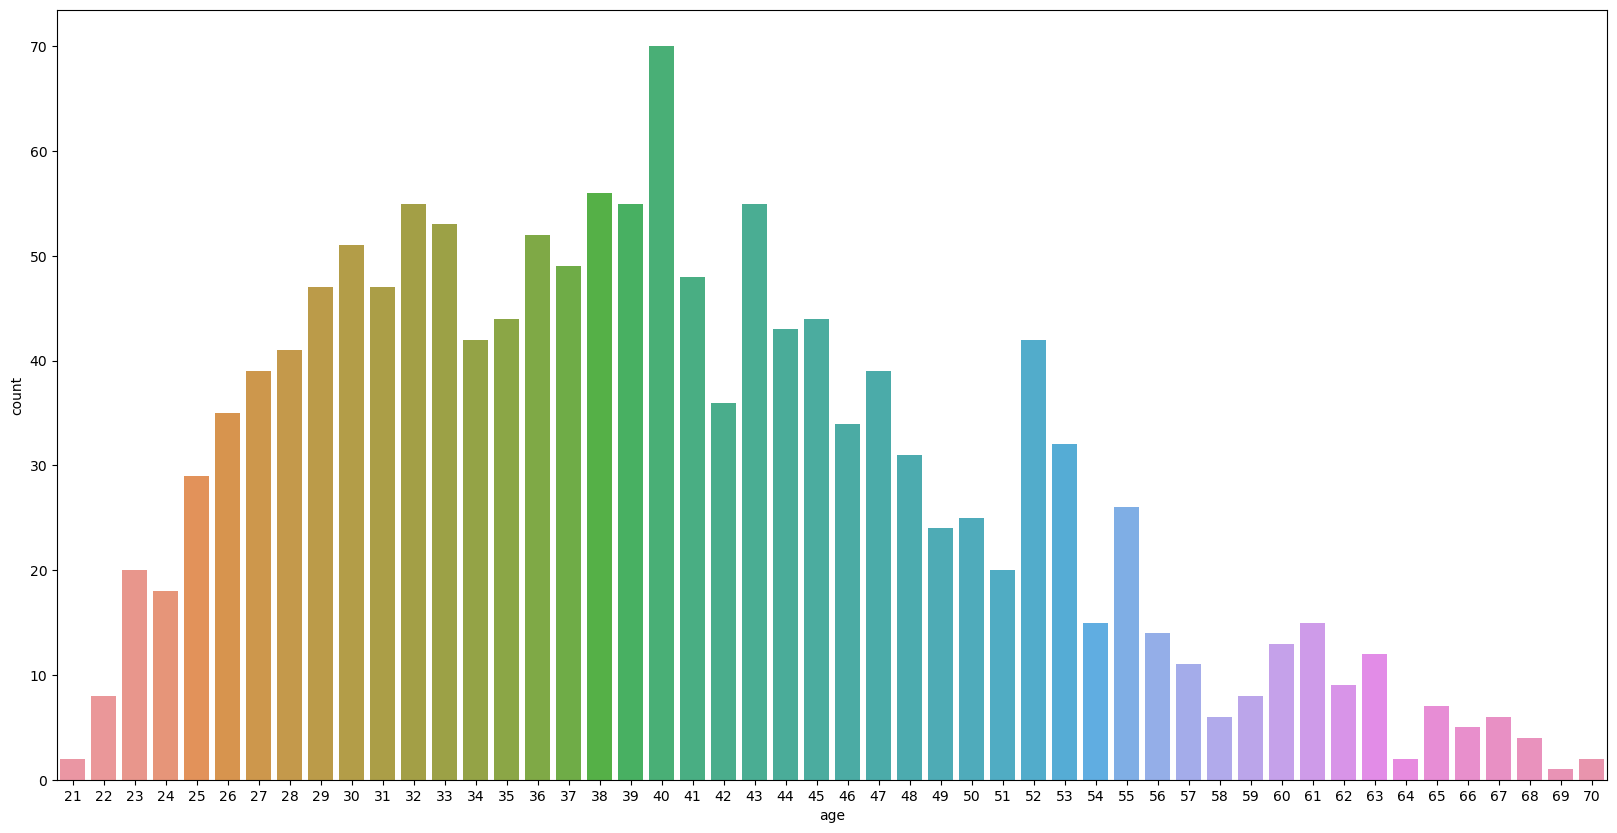

In [114]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

###numerical

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

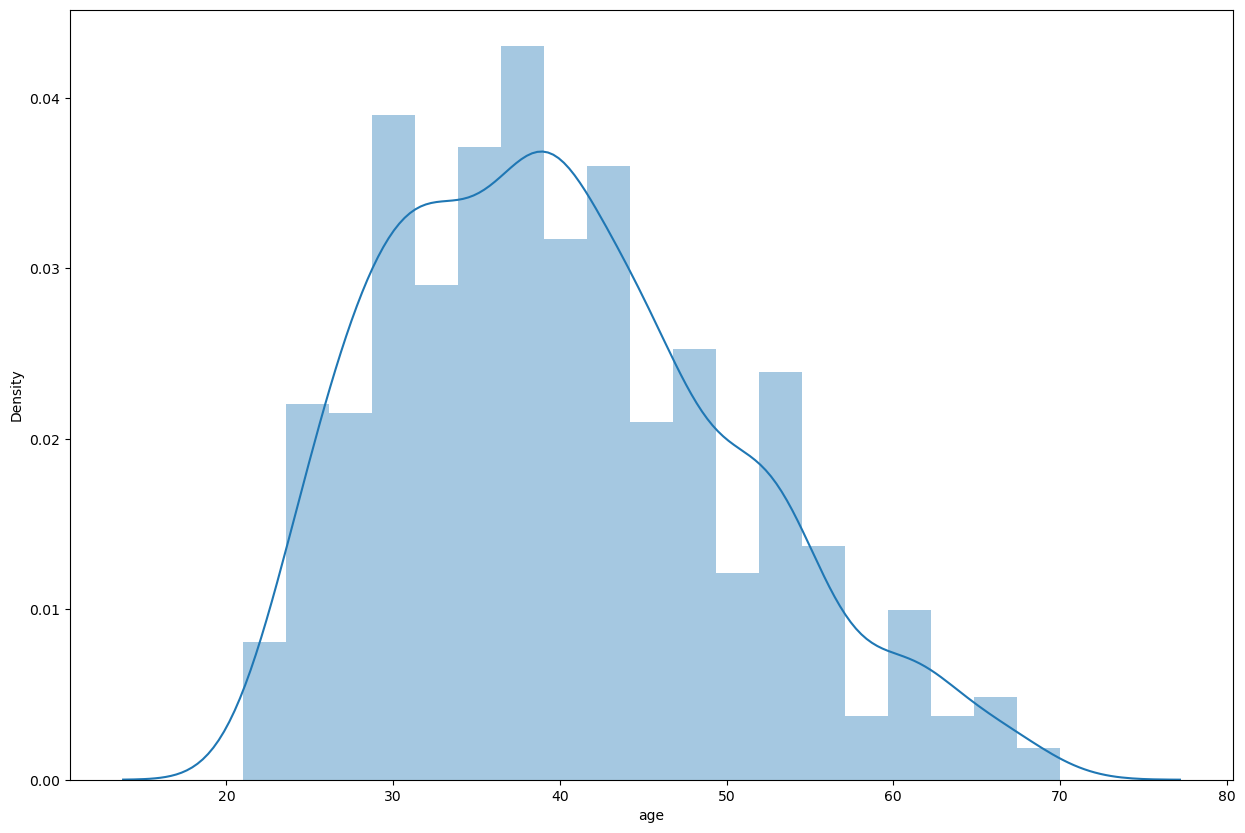

In [116]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Amount', ylabel='Density'>

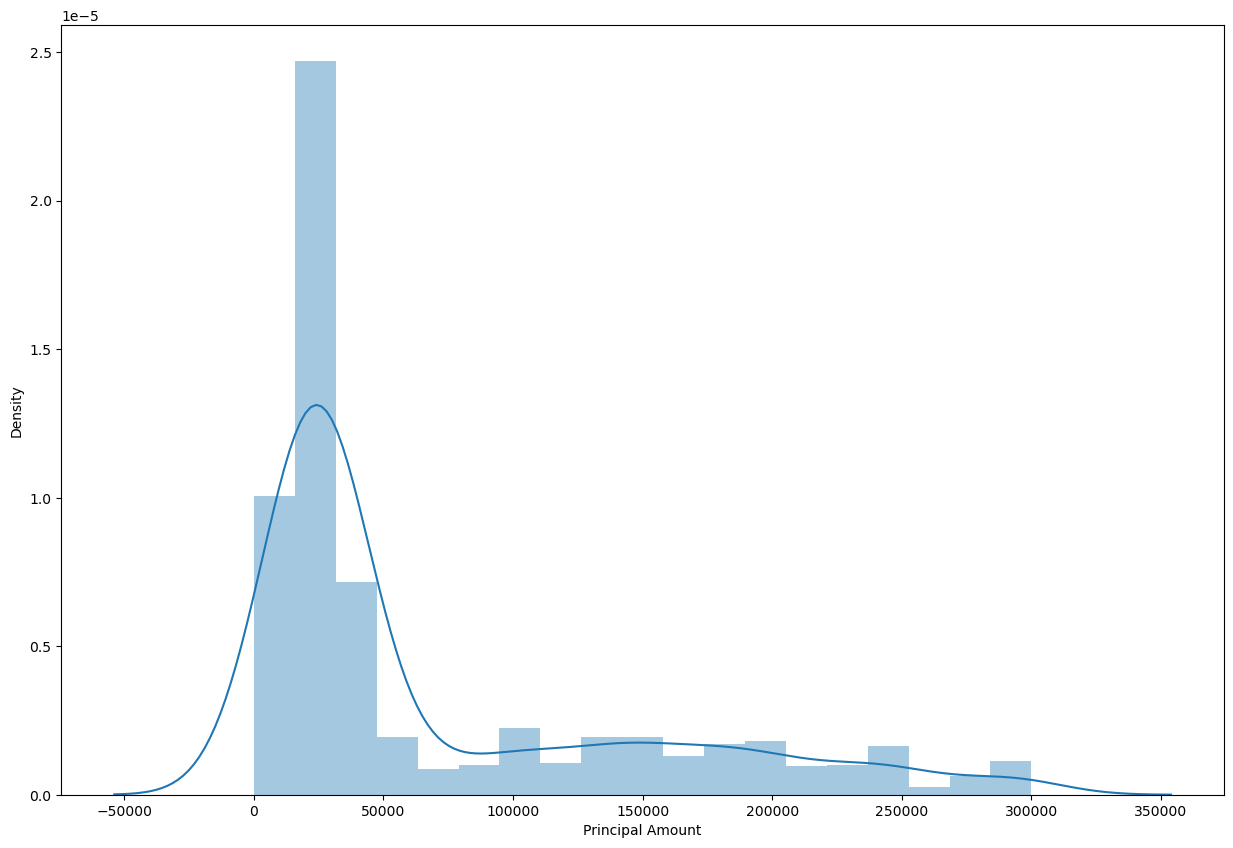

In [117]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Amount'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Repayment Tenor Month Number', ylabel='Density'>

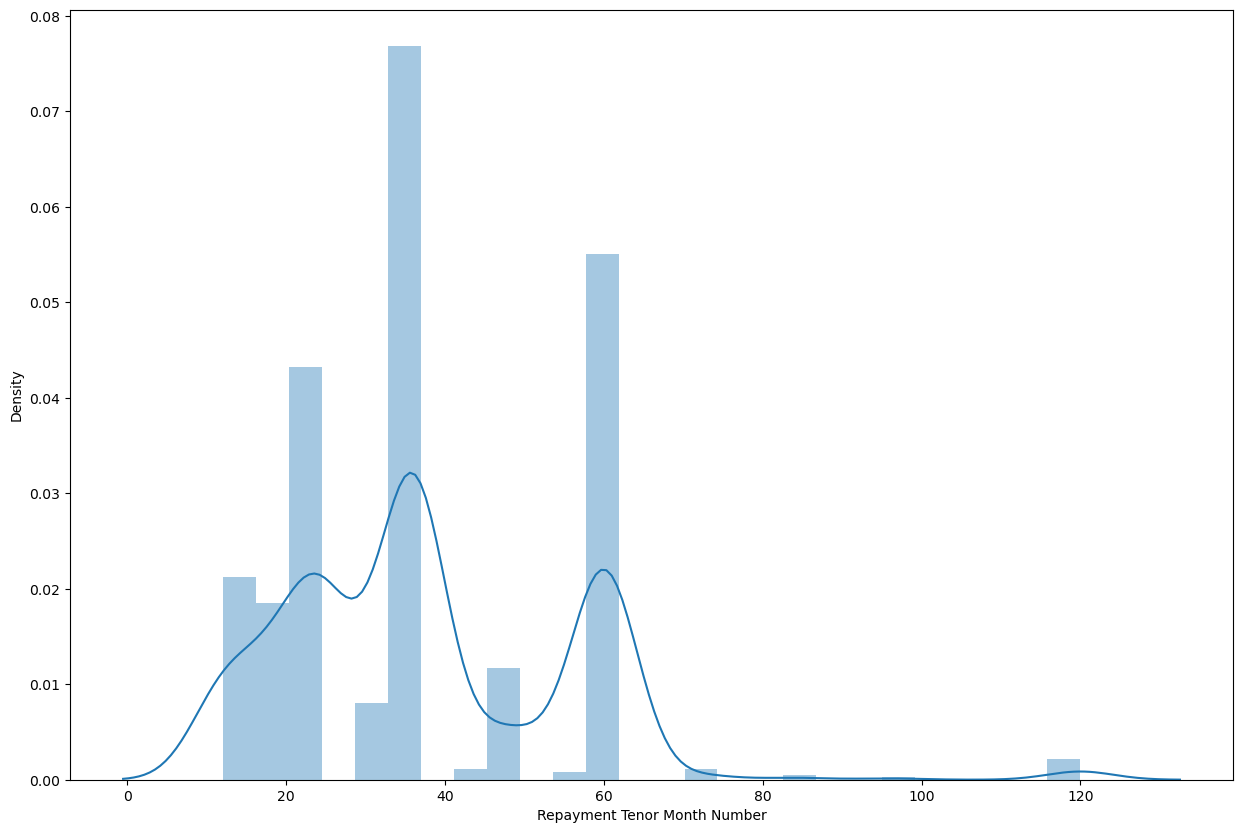

In [120]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Income Amount (Month)', ylabel='Density'>

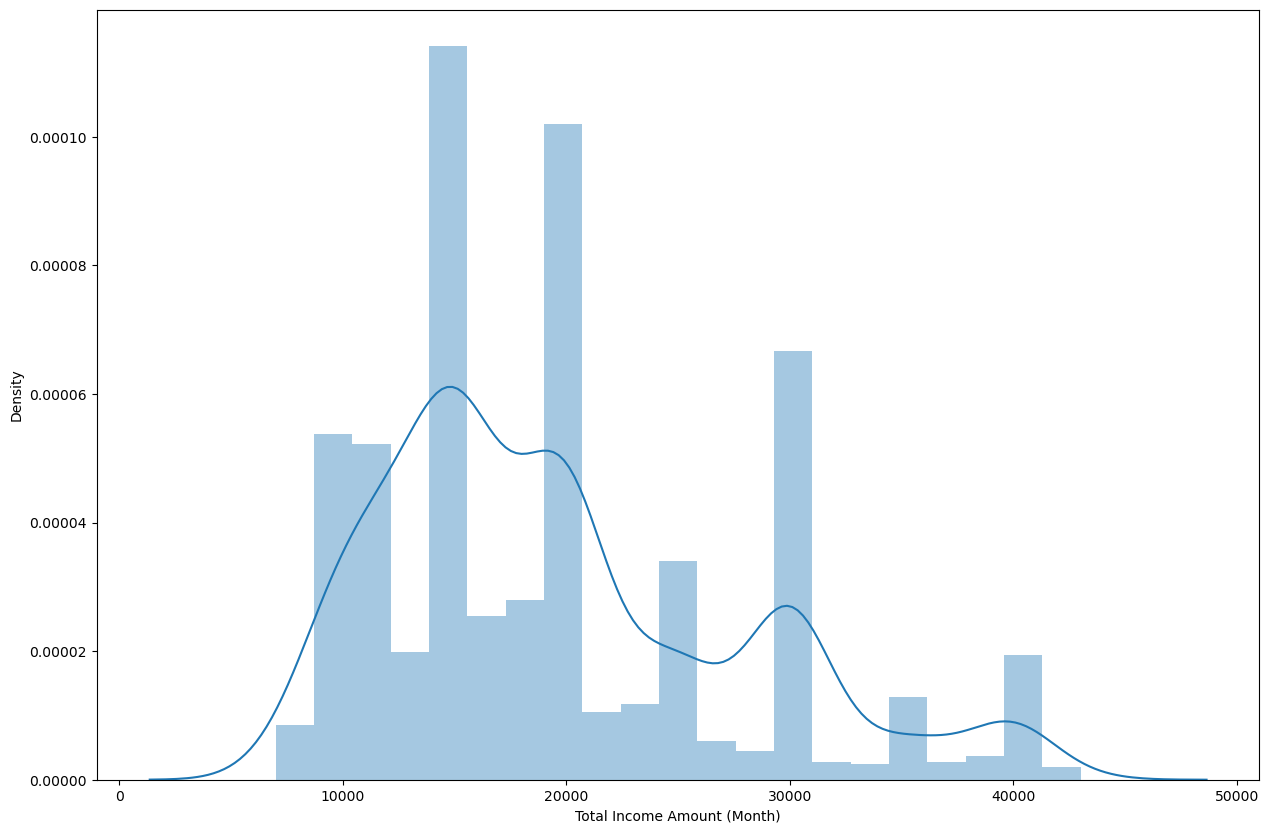

In [121]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

##Coorelation Matrix

In [122]:
df

Application Number  Principal Approve Amount  Principal Amount  \
0     25651219ULMB00227                   22500.0          22500.00   
1     25650928REUC00038                  120000.0         120000.00   
2     25650927REUM00073                   13000.0          12823.10   
3     25650818REUC00021                  200000.0          77913.26   
4     25650805ULCR00115                  210000.0         205582.98   
...                 ...                       ...               ...   
1620  25650727ULMB00082                   14000.0          14000.00   
1621  25650727ULMB00126                   45000.0          45000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1625  25650819ULMB00039                   39000.0          39000.00   
1626  25650822ULCR00153                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               24      M 1963-10-04                เกษตรกร   
1                               60      F 1970-11-02          STREET VENDOR   
2                               30      F 1958-05-26          STREET VENDOR   
3                               36      F 1998-04-20          พนักงานบริษัท   
4                               60      F 1971-07-01                เกษตรกร   
...                            ...    ...        ...                    ...   
1620                            12      F 1956-08-17          STREET VENDOR   
1621                            18      F 1988-01-16          พนักงานบริษัท   
1623                            60      M 1969-12-11              ข้าราชการ   
1625                            36      F 1988-01-09          พนักงานบริษัท   
1626                            60      F 1971-11-04                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         12000.0                   MC         HONDA  ...   
1                         15000.0                  CAR        NISSAN  ...   
2                         10000.0                   MC         HONDA  ...   
3                         25000.0                   PU        NISSAN  ...   
4                         12000.0                   PU         ISUZU  ...   
...                           ...                  ...           ...  ...   
1620                      15000.0                   MC        YAMAHA  ...   
1621                      40000.0                   MC         HONDA  ...   
1623                      36000.0                  CAR        TOYOTA  ...   
1625                      15000.0                   MC         HONDA  ...   
1626                      20000.0                   PU        NISSAN  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                    2011                 BJ             36000   
1                    2012                 BV            192000   
2                    2008                 AA             18000   
3                    2010                 CM            191500   
4                    2006                 CI            264500   
...                   ...                ...               ...   
1620                 2009                 AH             23000   
1621                 2017                 CQ             61500   
1623                 2010                 DX            222000   
1625                 2017                 CO             53000   
1626                 2019                 DQ            484500   

      System CAR Code (Daily) System CAR Code Date  \
0                          S1           2022-12-19   
1                          S1           2022-09-28   
2                          S1           2022-09-27   
3                          S1           2022-12-27   
4                          S1           2022-08-05   
...                       ...                  ...   
1620                       S3           2022-12-24   
1621                       S3           2022-12-27   

In [123]:
corr = df.corr()
corr

Principal Approve Amount  Principal Amount  \
Principal Approve Amount                      1.000000          0.949564   
Principal Amount                              0.949564          1.000000   
Repayment Tenor Month Number                  0.723794          0.713706   
Total Income Amount (Month)                   0.344888          0.331599   
Vehicle Release Year                         -0.239459         -0.246194   
Evaluation Amount                             0.914768          0.868986   
age                                           0.072309          0.070203   
Vehicle Age                                   0.239459          0.246194   

                              Repayment Tenor Month Number  \
Principal Approve Amount                          0.723794   
Principal Amount                                  0.713706   
Repayment Tenor Month Number                      1.000000   
Total Income Amount (Month)                       0.201776   
Vehicle Release Year                             -0.271968   
Evaluation Amount                                 0.655342   
age                                               0.040765   
Vehicle Age                                       0.271968   

                              Total Income Amount (Month)  \
Principal Approve Amount                         0.344888   
Principal Amount                                 0.331599   
Repayment Tenor Month Number                     0.201776   
Total Income Amount (Month)                      1.000000   
Vehicle Release Year                            -0.135516   
Evaluation Amount                                0.368746   
age                                              0.134342   
Vehicle Age                                      0.135516   

                              Vehicle Release Year  Evaluation Amount  \
Principal Approve Amount                 -0.239459           0.914768   
Principal Amount                         -0.246194           0.868986   
Repayment Tenor Month Number             -0.271968           0.655342   
Total Income Amount (Month)              -0.135516           0.368746   
Vehicle Release Year                      1.000000          -0.260107   
Evaluation Amount                        -0.260107           1.000000   
age                                      -0.155585           0.091930   
Vehicle Age                              -1.000000           0.260107   

                                   age  Vehicle Age  
Principal Approve Amount      0.072309     0.239459  
Principal Amount              0.070203     0.246194  
Repayment Tenor Month Number  0.040765     0.271968  
Total Income Amount (Month)   0.134342     0.135516  
Vehicle Release Year         -0.155585    -1.000000  
Evaluation Amount             0.091930     0.260107  
age                           1.000000     0.155585  
Vehicle Age                   0.155585     1.000000

<AxesSubplot:>

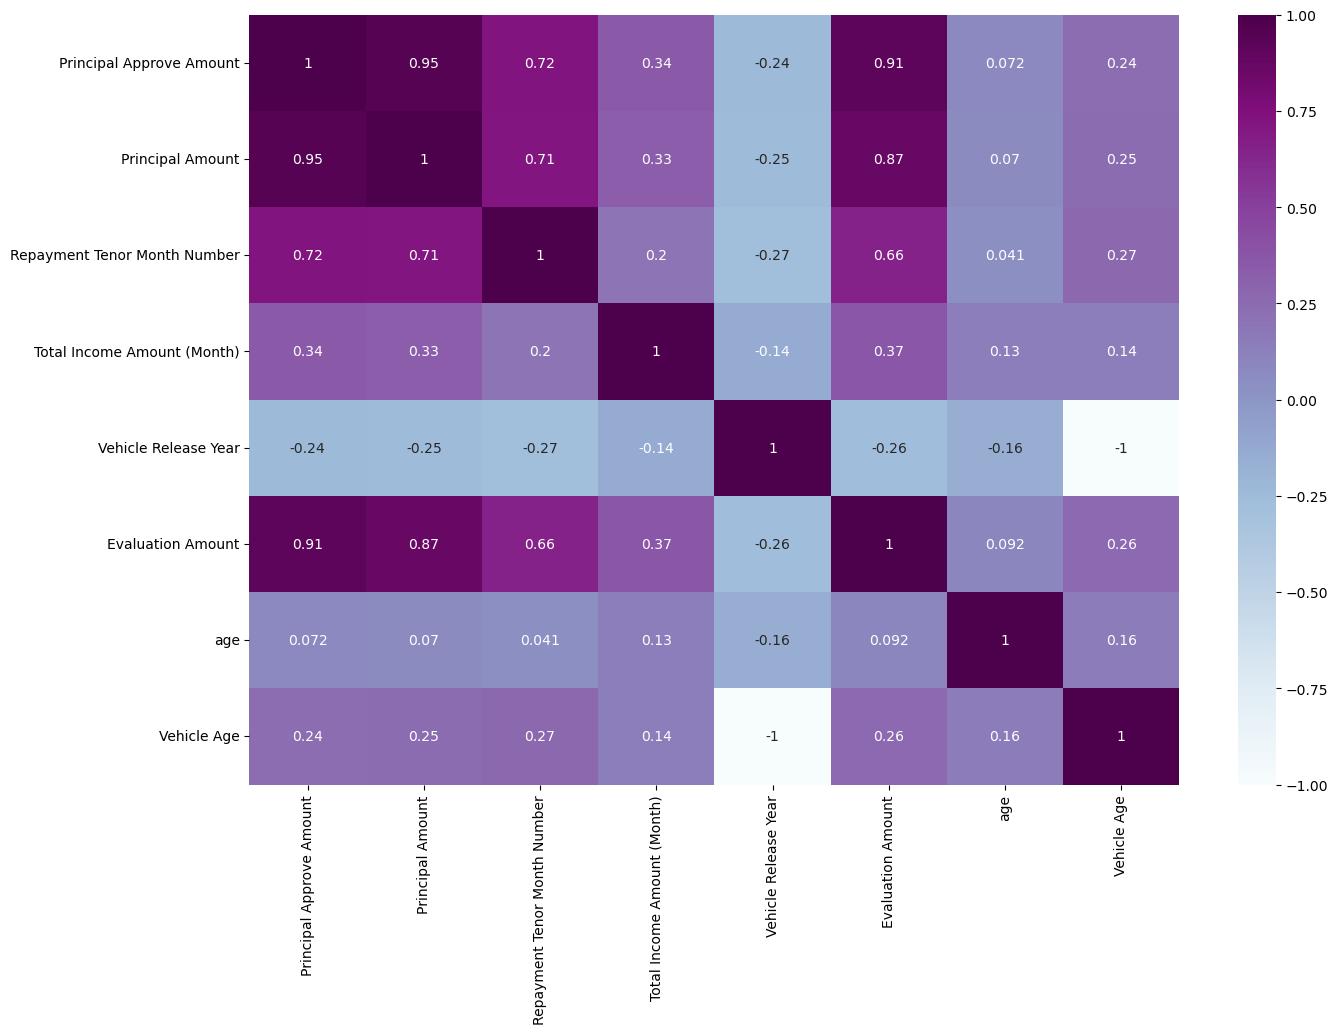

In [124]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [125]:
for i in category:
    print(f'{i}:{df[i].unique()}\n')

Collateral Type Code:['MC' 'CAR' 'PU' 'VAN']

Vehicle Release Year:[2011 2012 2008 2010 2006 2013 2014 2020 2007 2019 2016 2017 2018 2003
 2001 2005 2004 2009 2021 2015 1997 2002 2000 2022 1999 1995 1994 1996]

Vehicle Age:[12 11 15 13 17 10  9  3 16  4  7  6  5 20 22 18 19 14  2  8 26 21 23  1
 24 28 29 27]

age:[60 53 65 25 52 48 32 38 63 33 45 30 55 44 49 36 58 34 21 28 37 50 40 47
 59 61 26 51 57 35 56 27 46 41 29 24 43 67 23 31 42 54 66 68 22 69 70 62
 39 64]

Repayment Tenor Month Number:[ 24  60  30  36  12  48  18 120  84  42  72  96  54  61]

Occupation Description:['เกษตรกร' 'STREET VENDOR' 'พนักงานบริษัท' 'อื่นๆ' 'อาจารย์' 'เลี้ยงสัตว์'
 'พนักงานรัฐวิสาหกิจ' 'ข้าราชการ' 'วิศวกร' 'บุคลากรทางการแพทย์']

System CAR Code (Daily):['S1' 'S2' 'S3']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [127]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Collateral Type Code:MC     916
CAR    265
PU     253
VAN      8
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2012    136
2019    134
2010    106
2018    104
2016    103
2013    102
2017     99
2011     89
2014     70
2020     56
2005     56
2008     52
2015     50
2009     48
2007     42
2006     36
2003     33
2004     32
2021     24
2022     21
2002     20
2001     12
1999      5
1997      4
2000      3
1995      2
1994      2
1996      1
Name: Vehicle Release Year, dtype: int64

Vehicle Age:11    136
4     134
13    106
5     104
7     103
10    102
6      99
12     89
9      70
3      56
18     56
15     52
8      50
14     48
16     42
17     36
20     33
19     32
2      24
1      21
21     20
22     12
24      5
26      4
23      3
28      2
29      2
27      1
Name: Vehicle Age, dtype: int64

age:40    70
38    56
39    55
43    55
32    55
33    53
36    52
30    51
37    49
41    48
29    47
31    47
35    44
45    44
44    43
34    42
52    42
28    41
47 

In [128]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


In [129]:
df

Application Number  Principal Approve Amount  Principal Amount  \
0     25651219ULMB00227                   22500.0          22500.00   
1     25650928REUC00038                  120000.0         120000.00   
2     25650927REUM00073                   13000.0          12823.10   
3     25650818REUC00021                  200000.0          77913.26   
4     25650805ULCR00115                  210000.0         205582.98   
...                 ...                       ...               ...   
1620  25650727ULMB00082                   14000.0          14000.00   
1621  25650727ULMB00126                   45000.0          45000.00   
1623  25650804ULCR00031                  144000.0         144000.00   
1625  25650819ULMB00039                   39000.0          39000.00   
1626  25650822ULCR00153                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               24      M 1963-10-04                เกษตรกร   
1                               60      F 1970-11-02          STREET VENDOR   
2                               30      F 1958-05-26          STREET VENDOR   
3                               36      F 1998-04-20          พนักงานบริษัท   
4                               60      F 1971-07-01                เกษตรกร   
...                            ...    ...        ...                    ...   
1620                            12      F 1956-08-17          STREET VENDOR   
1621                            18      F 1988-01-16          พนักงานบริษัท   
1623                            60      M 1969-12-11              ข้าราชการ   
1625                            36      F 1988-01-09          พนักงานบริษัท   
1626                            60      F 1971-11-04                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  ...  \
0                         12000.0                   MC         HONDA  ...   
1                         15000.0                  CAR        NISSAN  ...   
2                         10000.0                   MC         HONDA  ...   
3                         25000.0                   PU        NISSAN  ...   
4                         12000.0                   PU         ISUZU  ...   
...                           ...                  ...           ...  ...   
1620                      15000.0                   MC        YAMAHA  ...   
1621                      40000.0                   MC         HONDA  ...   
1623                      36000.0                  CAR        TOYOTA  ...   
1625                      15000.0                   MC         HONDA  ...   
1626                      20000.0                   PU        NISSAN  ...   

     Vehicle Release Year  Vehicle Sub Model Evaluation Amount  \
0                    2011                 BJ             36000   
1                    2012                 BV            192000   
2                    2008                 AA             18000   
3                    2010                 CM            191500   
4                    2006                 CI            264500   
...                   ...                ...               ...   
1620                 2009                 AH             23000   
1621                 2017                 CQ             61500   
1623                 2010                 DX            222000   
1625                 2017                 CO             53000   
1626                 2019                 DQ            484500   

      System CAR Code (Daily) System CAR Code Date  \
0                          S1           2022-12-19   
1                          S1           2022-09-28   
2                          S1           2022-09-27   
3                          S1           2022-12-27   
4                          S1           2022-08-05   
...                       ...                  ...   
1620                       S3           2022-12-24   
1621                       S3           2022-12-27   

c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3625 (\N{THAI CHARACTER SO RUSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anac

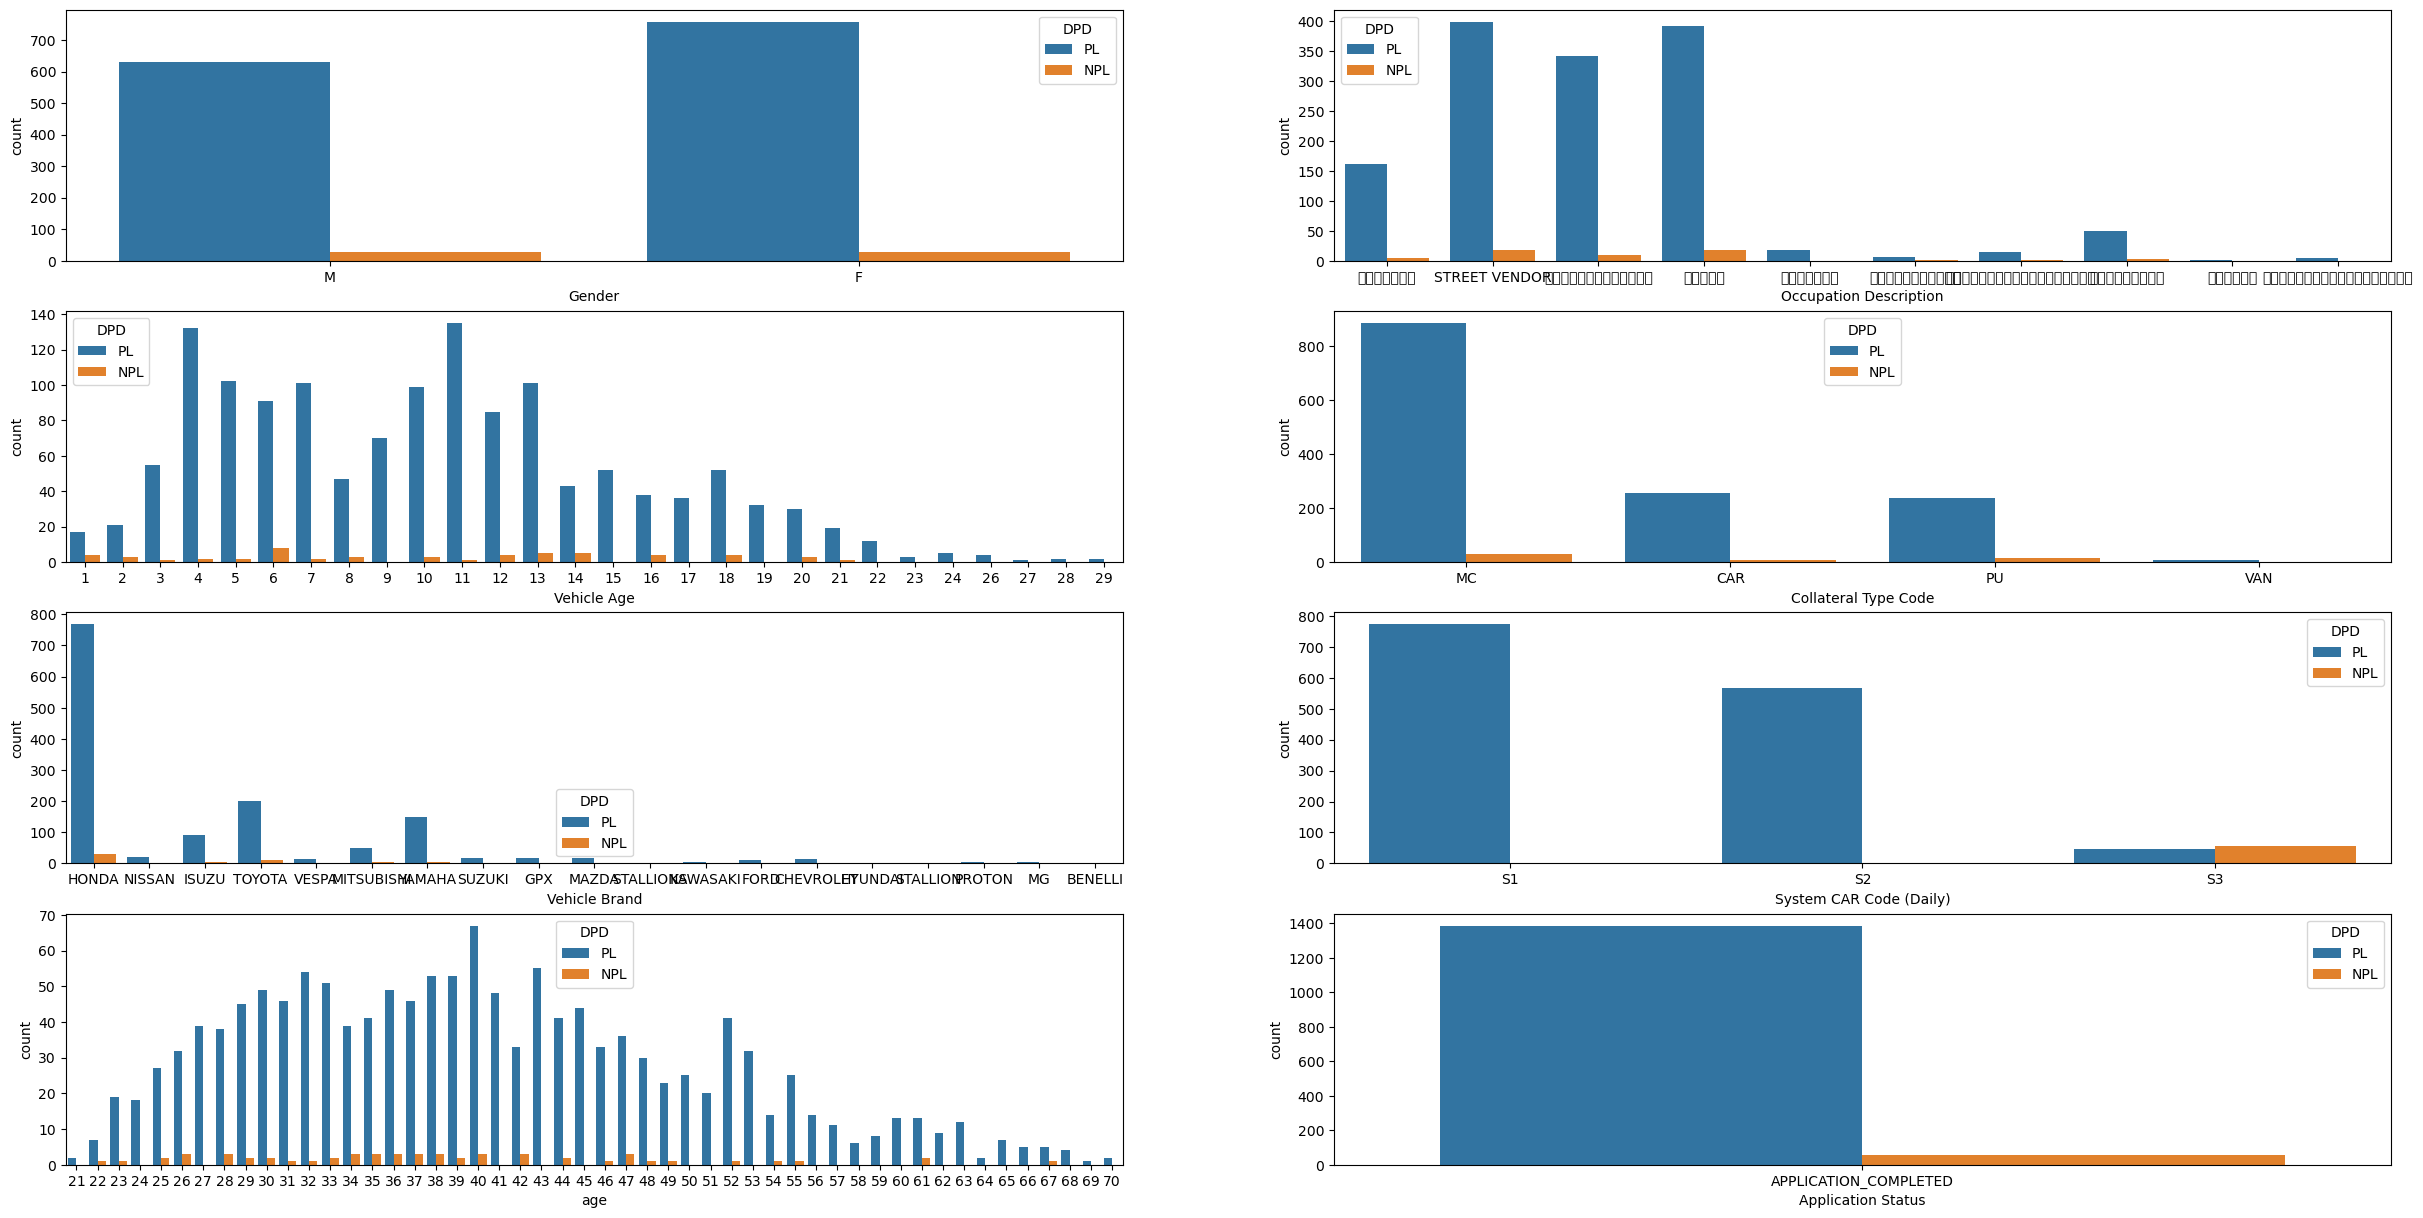

In [130]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

IndexError: index 3 is out of bounds for axis 0 with size 3

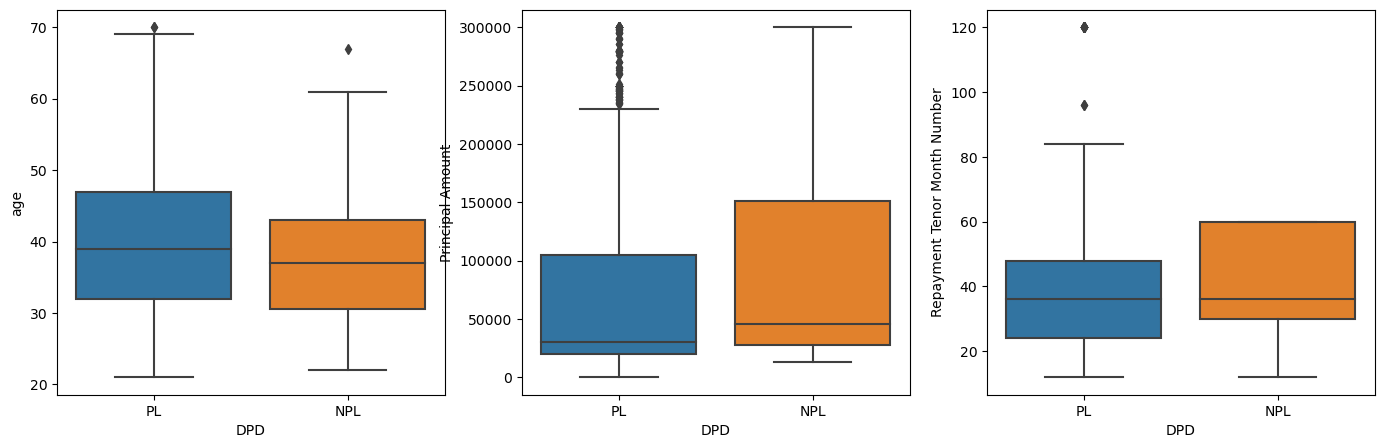

In [131]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [132]:
#cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']
cols = ['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number'
        ,'Total Income Amount (Month)','age','Vehicle Age']

#cols = ['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','age','Vehicle Age']

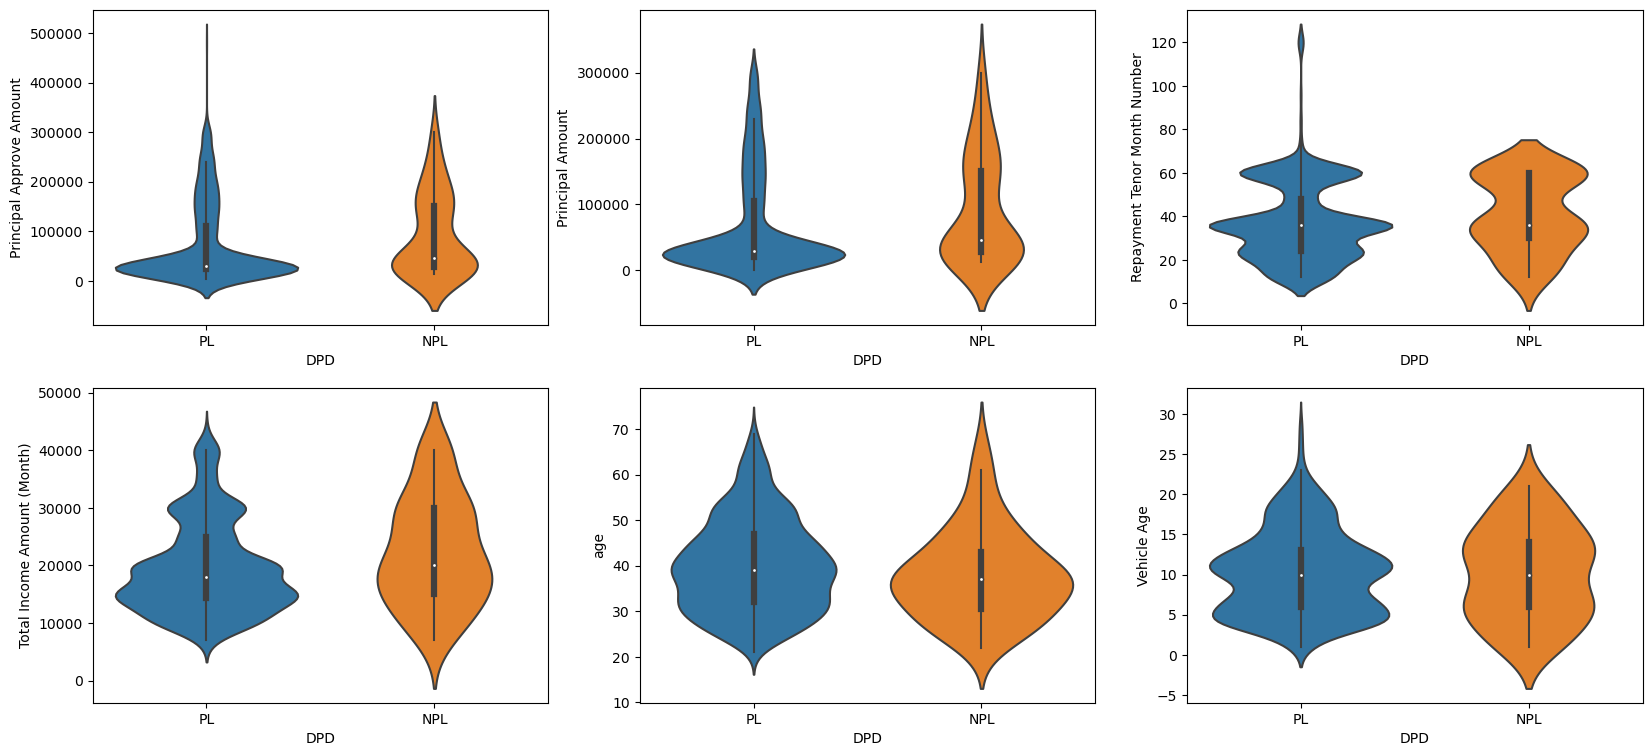

In [133]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

#Decision Tree

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [166]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

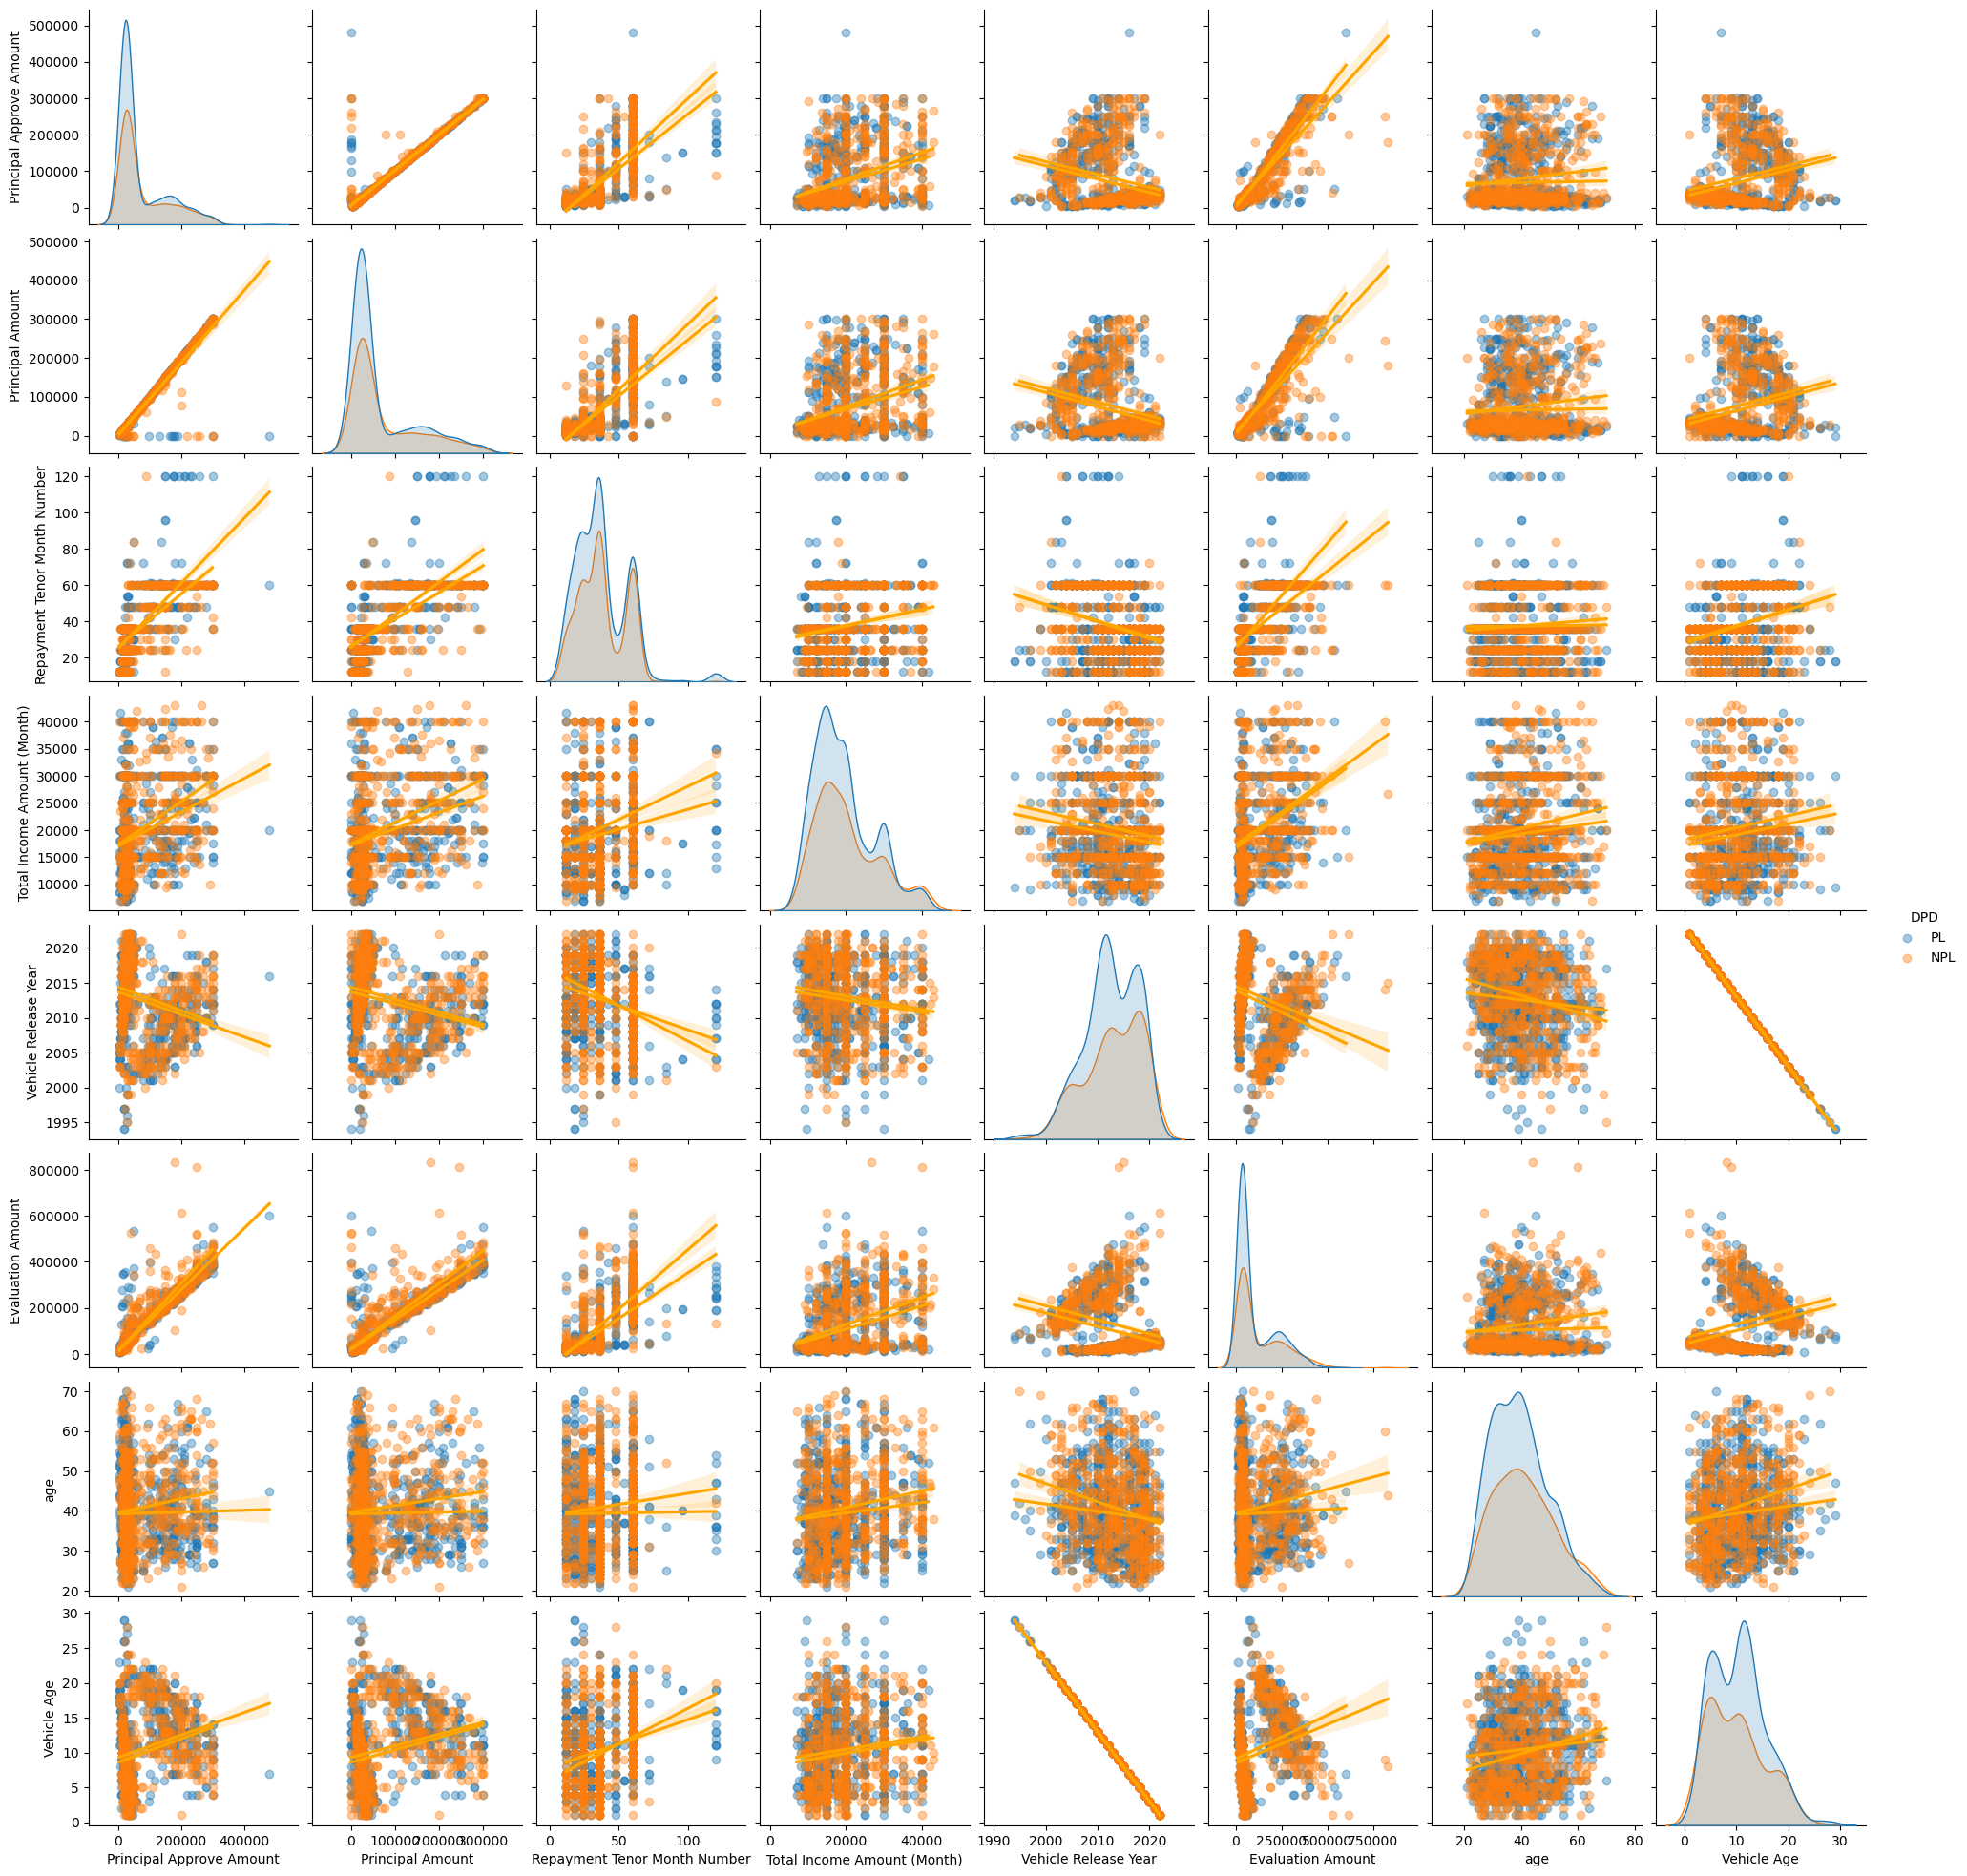

In [167]:
sns.pairplot(df,hue='DPD',
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [168]:
#cols = ['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','age','Vehicle Age']

In [169]:
X=df[cols] #features
y = df['DPD'] #label

In [170]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=101
)

In [171]:
from sklearn import tree

In [172]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [173]:
X_train.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Total Income Amount (Month)', 'age',
       'Vehicle Age'],
      dtype='object')

##Feature Importances

In [174]:
model.feature_importances_

array([0.14948516, 0.18555812, 0.0947254 , 0.14604913, 0.2768083 ,
       0.14737389])

In [175]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

age                             0.276808
Principal Amount                0.185558
Principal Approve Amount        0.149485
Vehicle Age                     0.147374
Total Income Amount (Month)     0.146049
Repayment Tenor Month Number    0.094725
dtype: float64

In [176]:
fs.sum()

1.0

<AxesSubplot:>

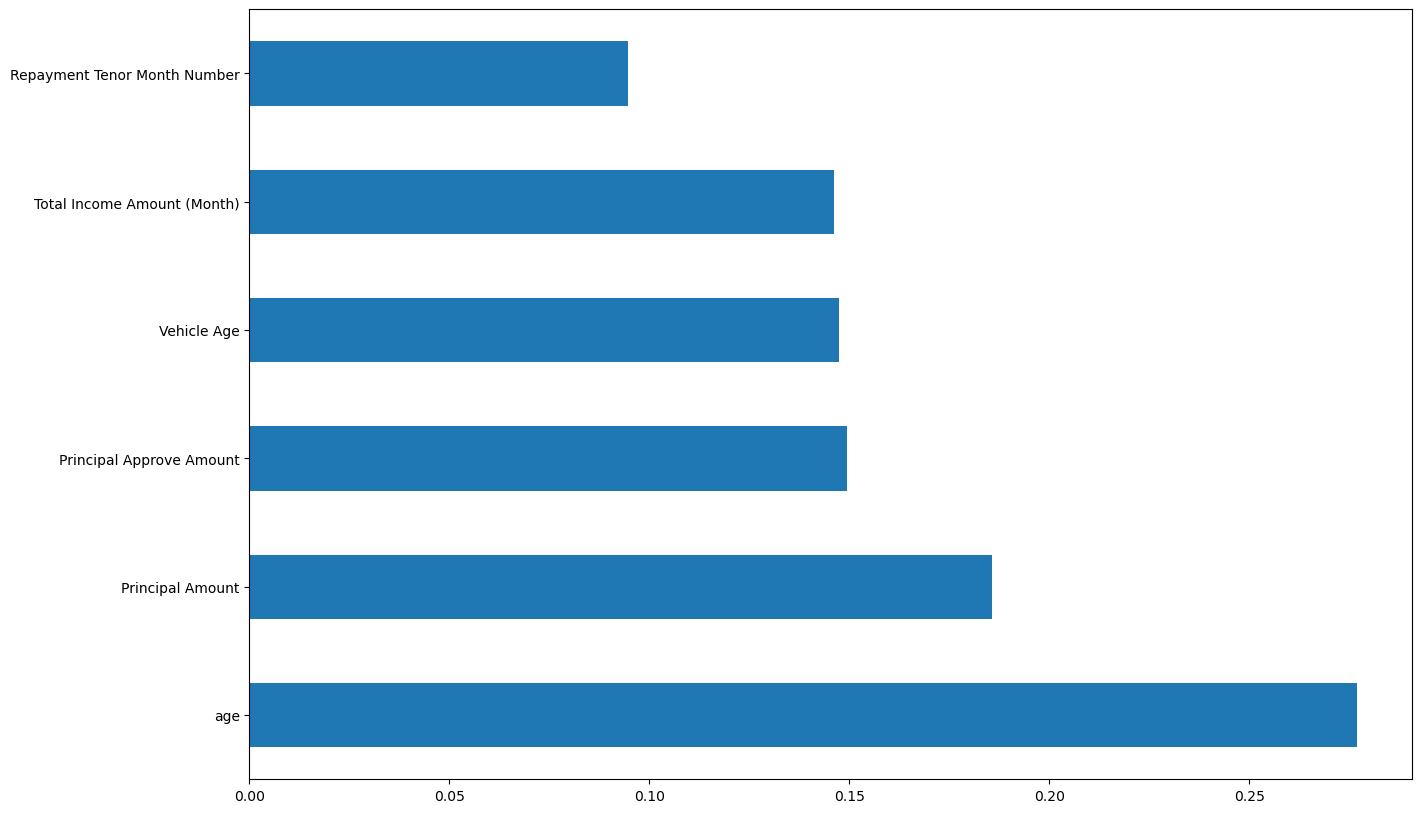

In [177]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

##Train Test Split

In [178]:
y_train.value_counts()

PL     680
NPL    473
Name: DPD, dtype: int64

In [179]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [180]:
X = df[['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age']]
y = df['DPD']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(1009, 6)

###Feature Scaling -> StandardScarler

In [182]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

###Feature Scaling -> MinMaxScaler

In [ ]:
'''#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit_transform(X_train)[:5])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)'''

In [183]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [184]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.5473441108545035


[Text(0.5570283600493219, 0.9814814814814815, 'node #0\nPrincipal Amount <= -0.53\nentropy = 0.978\nsamples = 1009\nvalue = [416, 593]\nclass = PL'),
 Text(0.2849491368680641, 0.9444444444444444, 'node #1\nPrincipal Amount <= -0.563\nentropy = 0.929\nsamples = 496\nvalue = [171, 325]\nclass = PL'),
 Text(0.1444975339087546, 0.9074074074074074, 'node #2\nVehicle Age <= -0.703\nentropy = 0.95\nsamples = 414\nvalue = [153, 261]\nclass = PL'),
 Text(0.05240443896424168, 0.8703703703703703, 'node #3\nPrincipal Amount <= -0.624\nentropy = 1.0\nsamples = 98\nvalue = [49, 49]\nclass = NPL'),
 Text(0.02219482120838471, 0.8333333333333334, 'node #4\nPrincipal Approve Amount <= -0.801\nentropy = 0.954\nsamples = 48\nvalue = [30, 18]\nclass = NPL'),
 Text(0.012330456226880395, 0.7962962962962963, 'node #5\nTotal Income Amount (Month) <= -1.049\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]\nclass = PL'),
 Text(0.007398273736128237, 0.7592592592592593, 'node #6\nentropy = 0.0\nsamples = 1\nvalue = [1

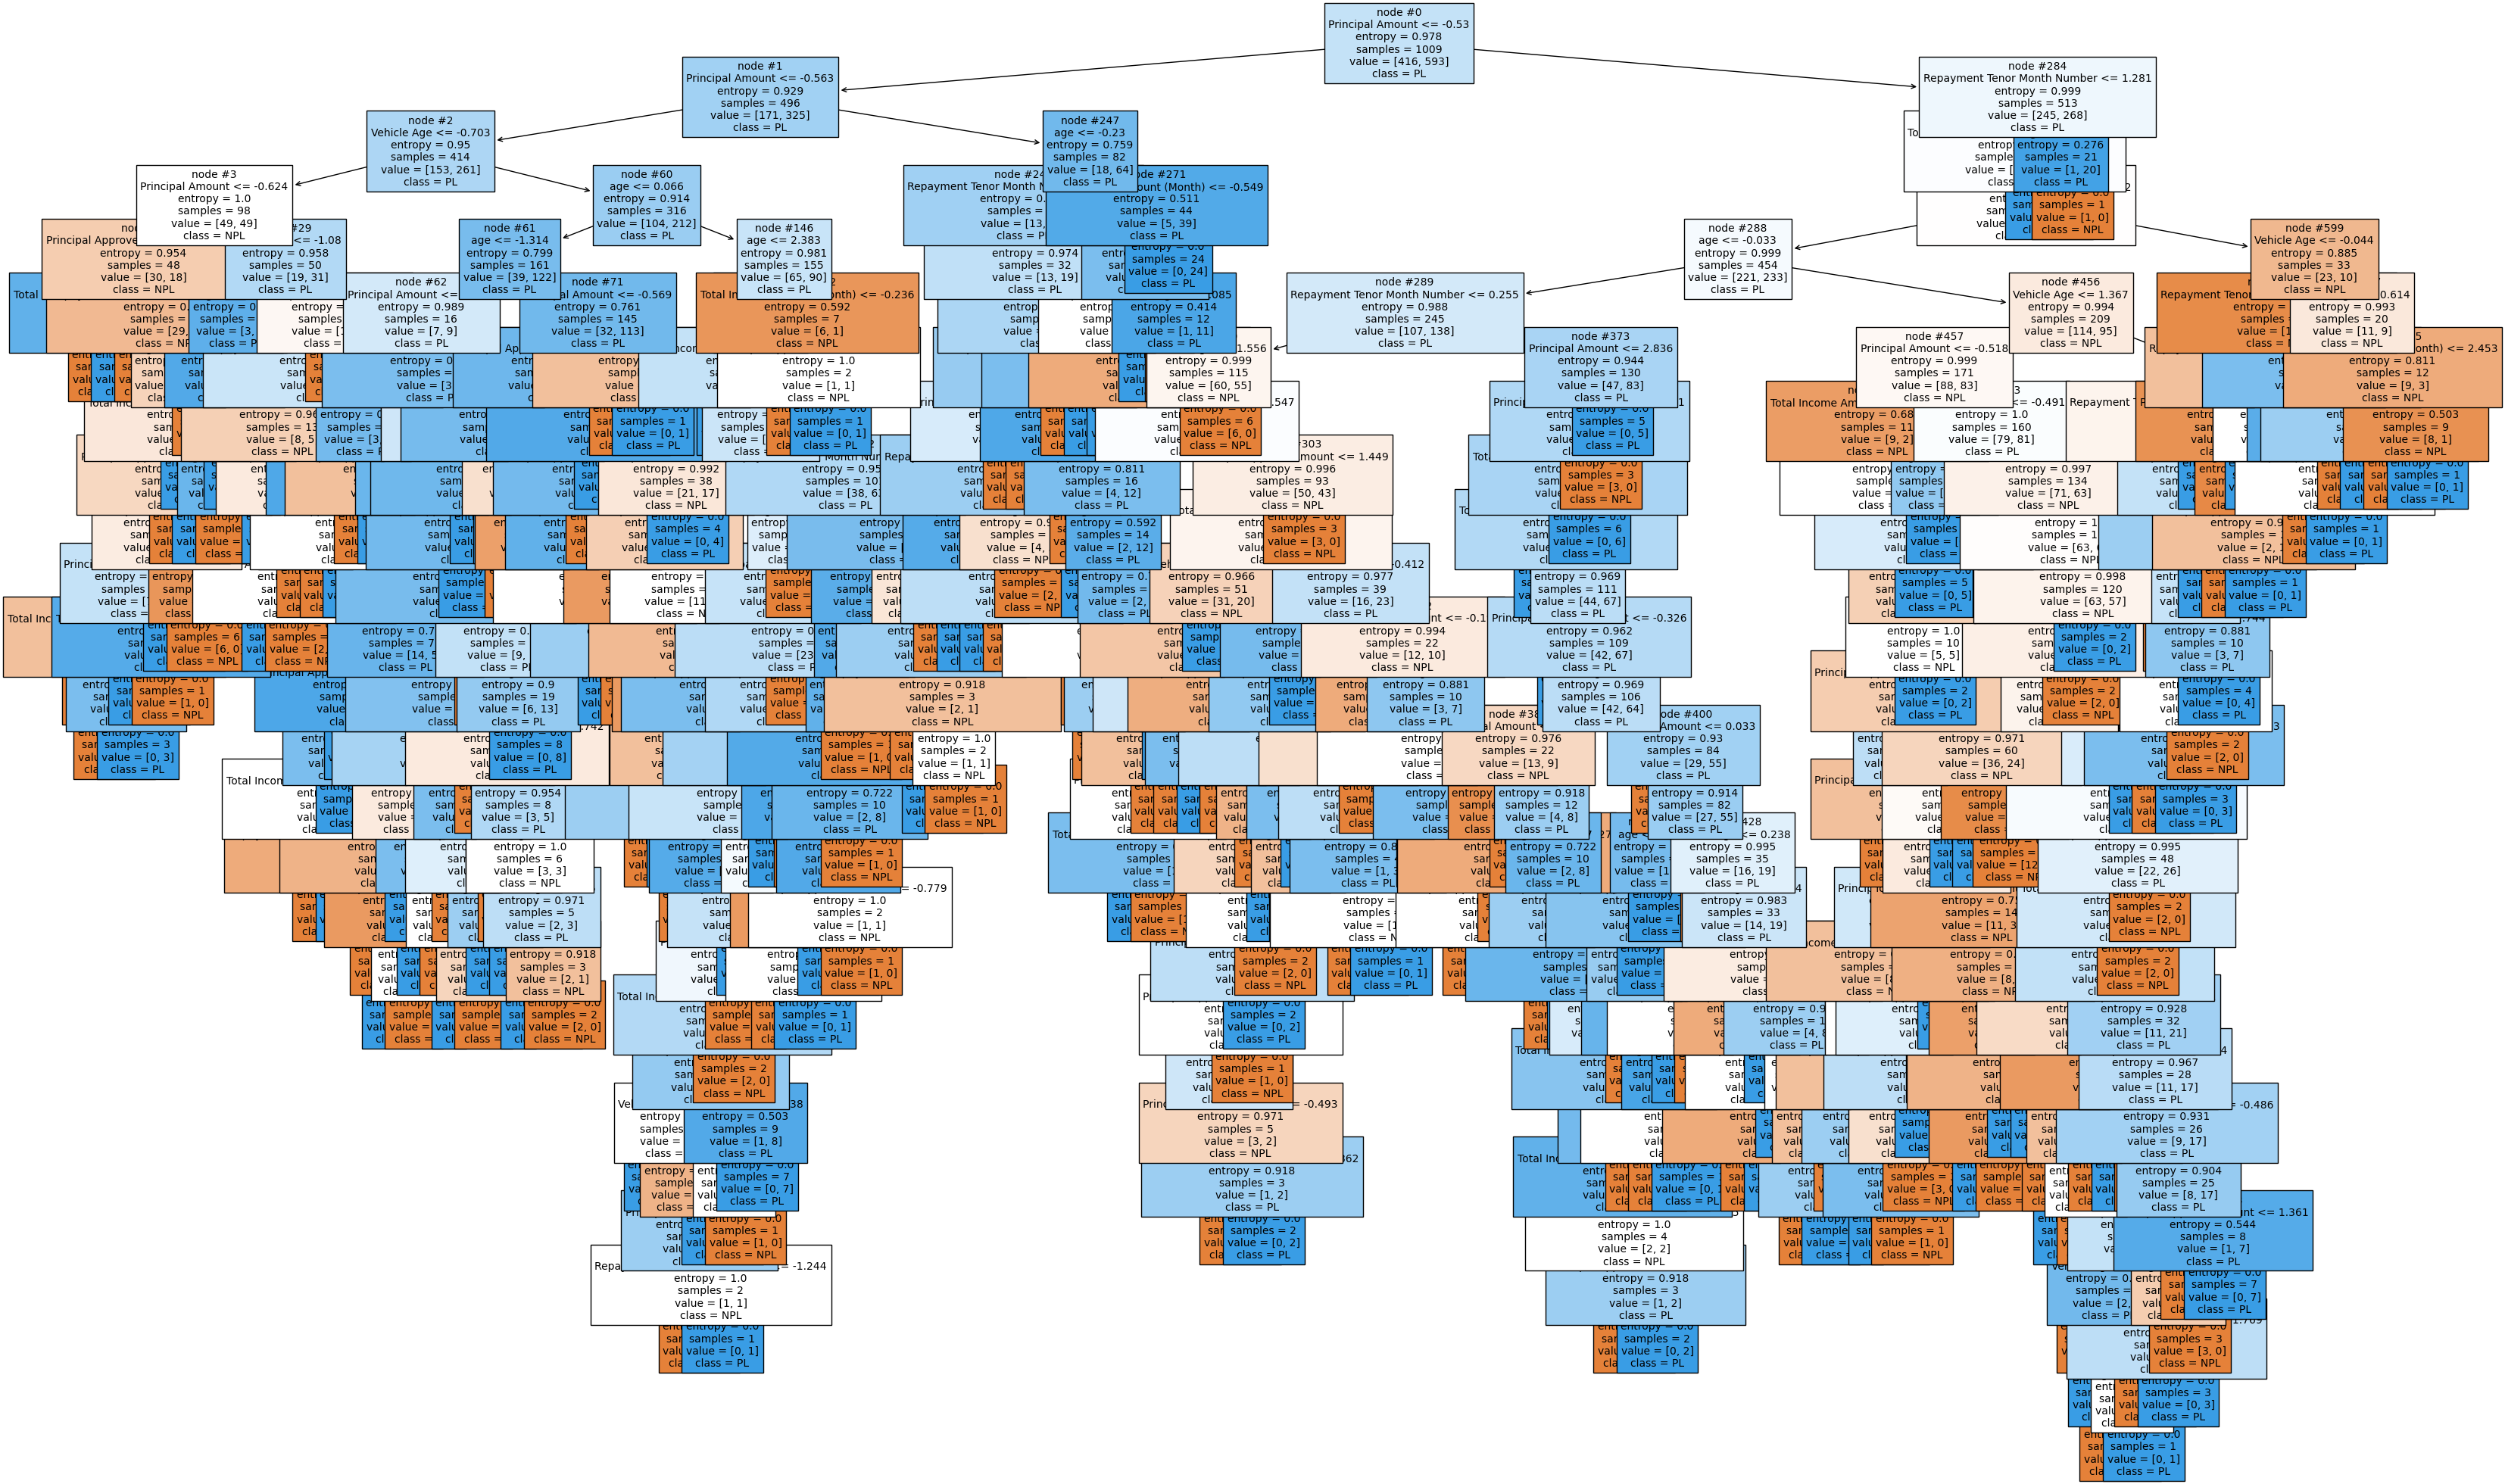

In [185]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [186]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6027713625866051


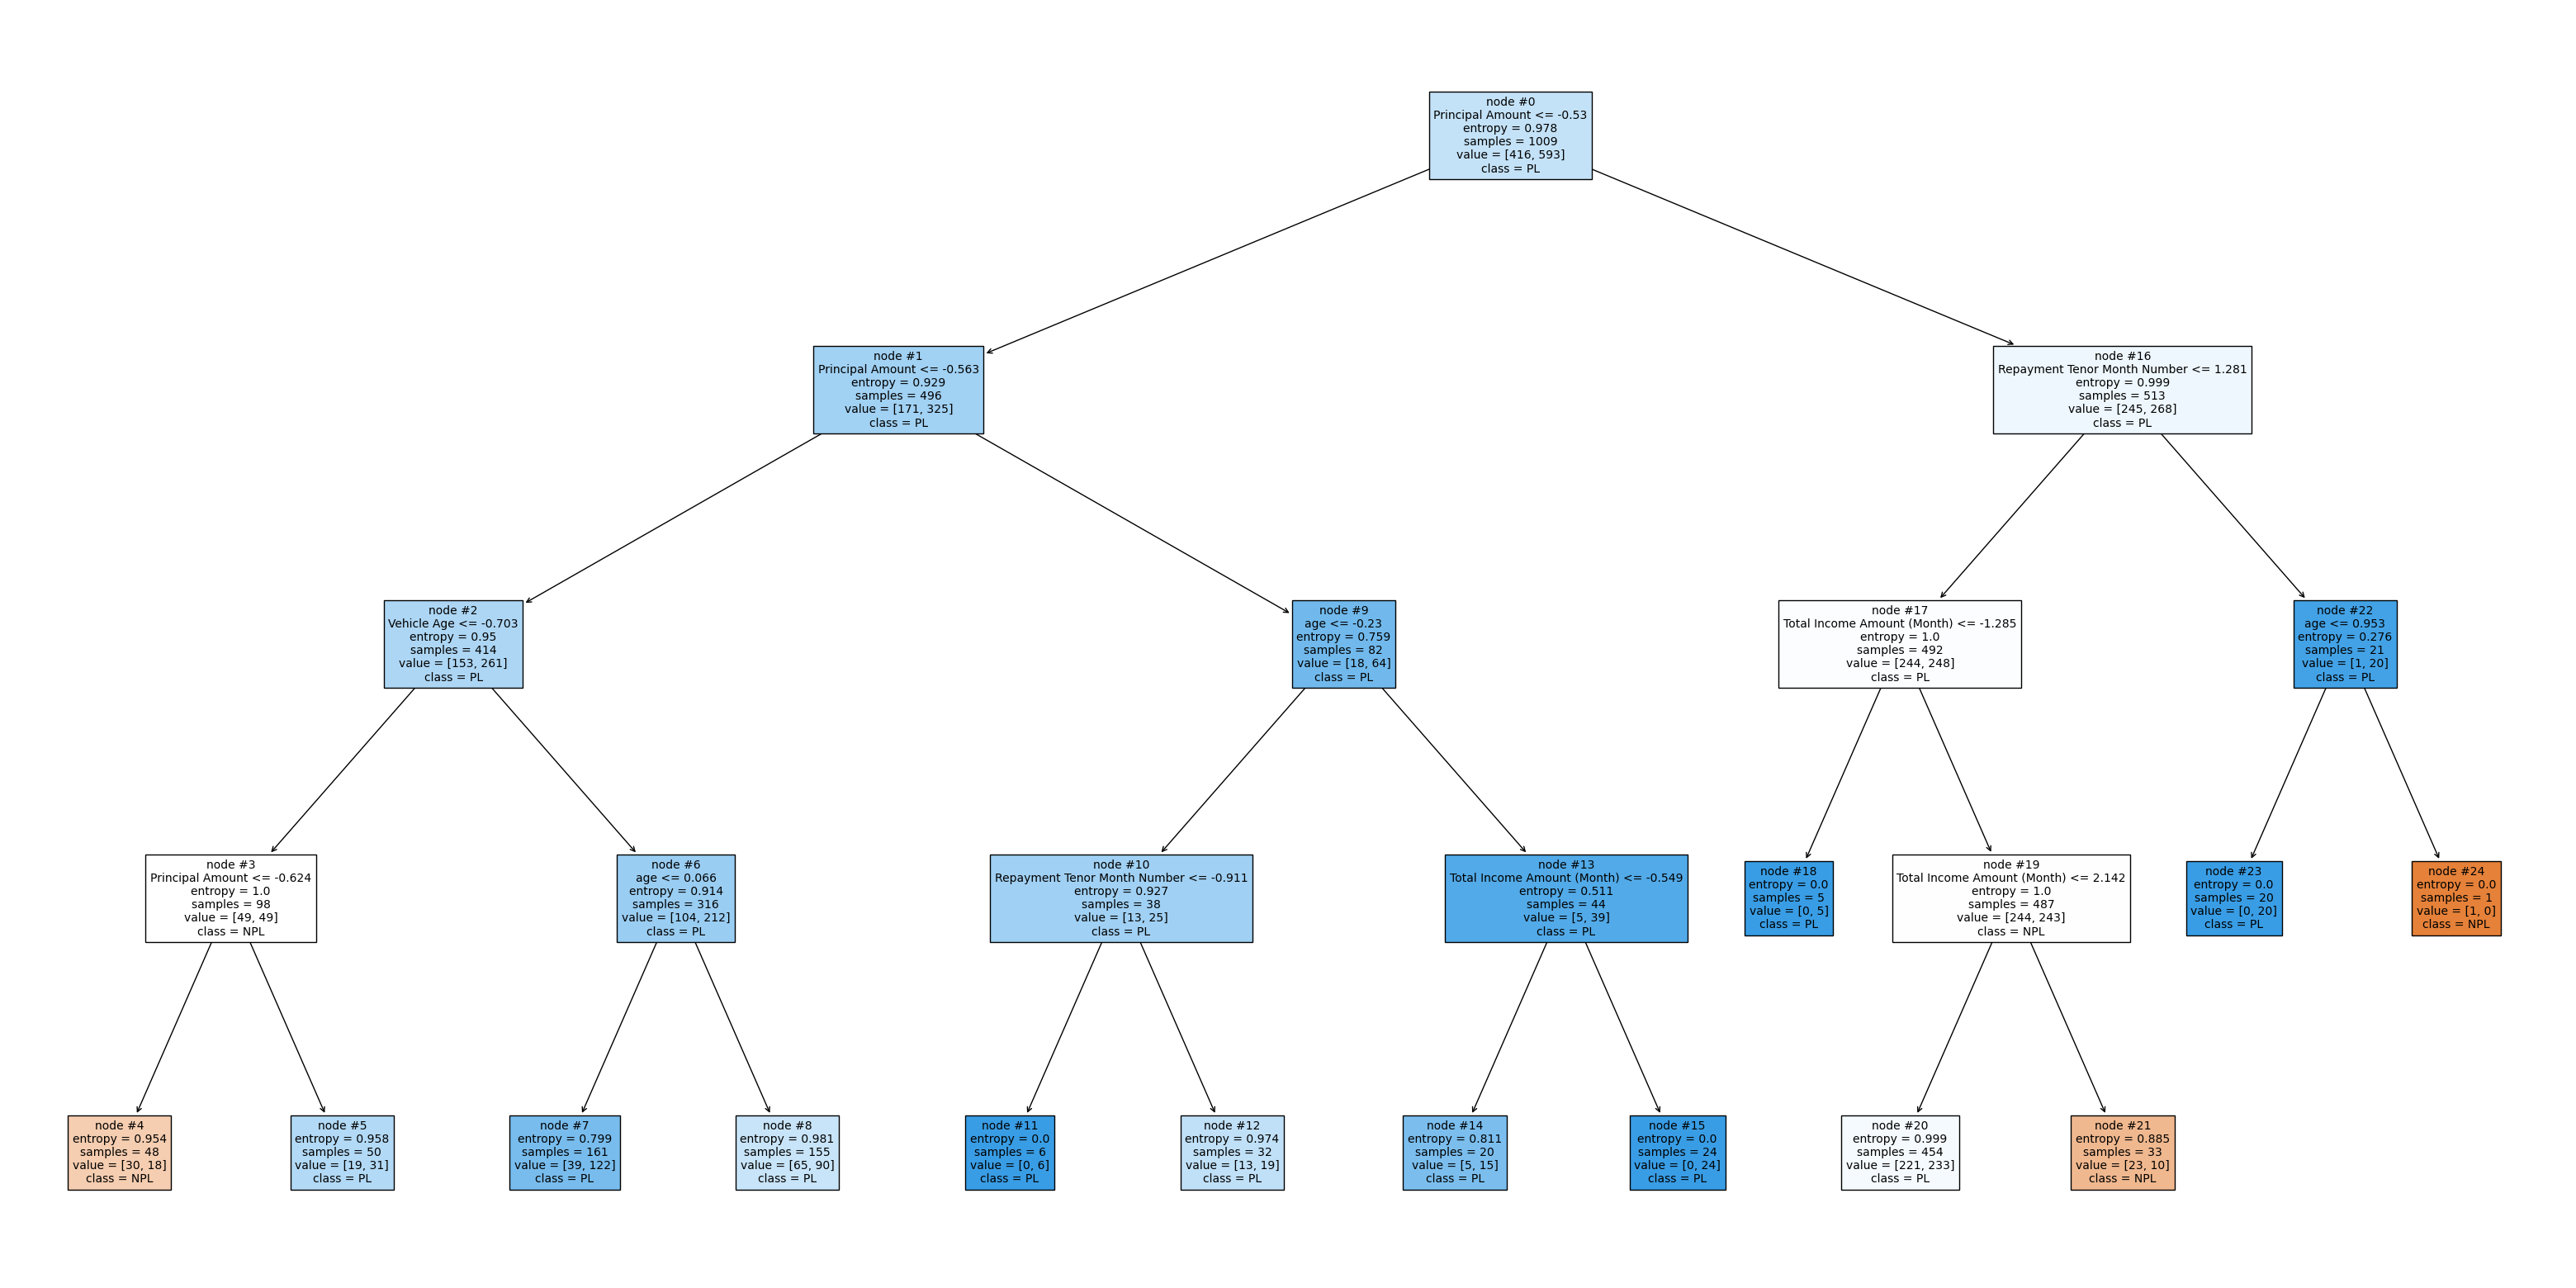

In [187]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                node_ids=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo22.csv')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [ ]:
model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(X_train,y_train)
classifier

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

In [ ]:
model.feature_importances_

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = RandomForestClassifier(n_estimators=250, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#Decision Tree 2

In [ ]:
df2 = df.copy()

In [ ]:
df2.to_csv('chaiyo22.csv')

In [ ]:
df2 = pd.read_csv('chaiyo22.csv')

In [ ]:
df2.head(5)

In [ ]:
print(df2.columns)

##Drop Columns ที่ไม่จำเป็น

In [ ]:
cols = ['Application Number','Principal Approve Amount','DOB', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)','Vehicle Model',
       'System CAR Code Date', 'Final CAR Code Previous Month','Application Status']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

In [ ]:
sns.pairplot(df2,hue='DPD',
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand']
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
corr = df2.corr()
corr

In [ ]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

##Train Test Split

In [ ]:
X = df2.drop(columns=['DPD'], axis=1)
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=10)
    print("Cross Validation is ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

In [ ]:
sns.pairplot(df2,hue='DPD',
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [ ]:
print(df2.columns)

In [ ]:
cols = ['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description',
        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','age', 'Vehicle Age']

In [ ]:
X=df2[cols] #features
y = df2['DPD'] #label

In [ ]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=101
)

In [ ]:
from sklearn import tree

In [ ]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

In [ ]:
X_train.columns

In [ ]:
model.feature_importances_

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

In [ ]:
fs.sum()

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [ ]:
y_train.value_counts()

In [ ]:
X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

In [ ]:
'''#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

In [ ]:
df2.columns

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

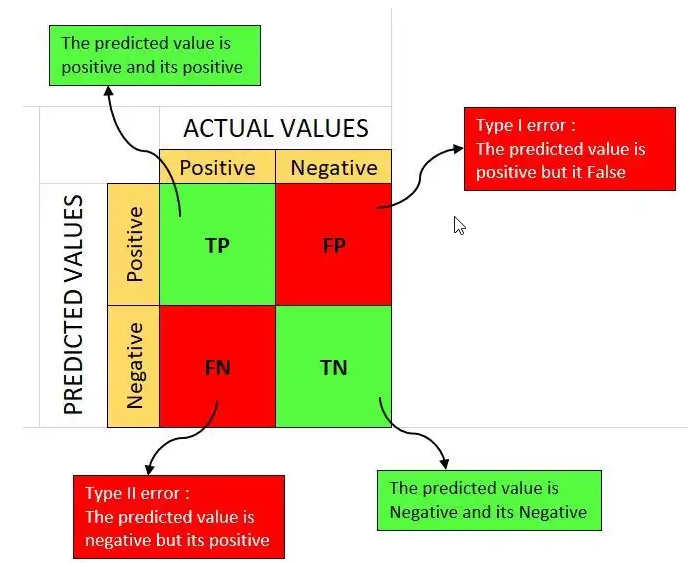


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.grid()